In [18]:
import re 
import json
#import grequests
import requests
from bs4 import BeautifulSoup
from datetime import datetime 
import os
import pandas as pd
import shutil
import yaml
import pickle
#from helium import *
import time
import traceback
import numpy as np

import undetected_chromedriver.v2 as uc

from agenda_tools import get_schedule, download_images, get_category
from agenda_tools.tools import remove_blank_spaces
from requests_html import HTMLSession
from IPython.display import Image
import urllib

session = HTMLSession()

from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
from agenda_tools.get_schedule import remove_blank_spaces
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys

from selenium.common.exceptions import TimeoutException
from concurrent.futures import ThreadPoolExecutor
    

In [6]:
! pwd

/home/cesarppz/Documents/jobs/web_scraping/javier/agenda


In [7]:
with open('/home/cesarppz/Documents/jobs/web_scraping/mapandmarket/inmobiliaria/filename.pickle', 'rb') as handle:
    b = pickle.load(handle)

# Firefox

In [2]:
from selenium import webdriver


options = webdriver.FirefoxOptions()
options.add_argument('--private')
# options.add_argument('--no-sandbox')
options.add_argument('user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:102.0) Gecko/20100101 Firefox/102.0')
fp = webdriver.FirefoxProfile()
fp.set_preference("dom.popup_maximum", 0)
driver = webdriver.Firefox(executable_path='/home/cesarppz/Documents/jobs/web_scraping/javier/agenda/driver/geckodriver', options=options, firefox_profile=fp)
driver.implicitly_wait(5)

/tmp/ipykernel_1158/2023172539.py:8: DeprecationWarning: firefox_profile has been deprecated, please use an Options object
  fp = webdriver.FirefoxProfile()
/tmp/ipykernel_1158/2023172539.py:10: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Firefox(executable_path='/home/cesarppz/Documents/jobs/web_scraping/javier/agenda/driver/geckodriver', options=options, firefox_profile=fp)
/tmp/ipykernel_1158/2023172539.py:10: DeprecationWarning: firefox_profile has been deprecated, please pass in an Options object
  driver = webdriver.Firefox(executable_path='/home/cesarppz/Documents/jobs/web_scraping/javier/agenda/driver/geckodriver', options=options, firefox_profile=fp)


# Chrome

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

options = uc.ChromeOptions()
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://www.google.com")

In [53]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

options = uc.ChromeOptions()
options.user_data_dir = "c:\\temp\\profile"
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:102.0) Gecko/20100101 Firefox/102.0")
driver = uc.Chrome(service=Service(ChromeDriverManager().install()), options=options)


In [48]:
url = 'https://www.idealista.com'
driver.get(url)

# Job

In [3]:
url = 'https://trade.dydx.exchange/trade/AVAX-USD'
driver.get(url)

In [13]:
driver.find_element('xpath', '//span[@class="AZo34VCmA4oZOJ3Yp3mqn"]').click()

In [14]:
names = [i.text for i in driver.find_elements('xpath', '//div[@class="_6_s1igBgOZG_l67nN_HjG"]/div//div[@class="_3703-MxhX16pYBOSod3SpG"]/span')]

In [15]:
data = [i.text for i in driver.find_elements('xpath', '//div[@class="_6_s1igBgOZG_l67nN_HjG"]/div//div[@class="_2d-dptgdt6bp7FHSPkHbT6"]/span')]

In [128]:
data = [i.replace('$','$') for i in data]

In [8]:
df = pd.Series({'Name':names[0], 'Price':data[0]})

In [79]:
df.to_excel('//mnt/c/Users/cesar/Desktop/resuilts_coins.xlsx', sheet_name=names[0], index=False)

In [16]:
df = pd.read_excel('//mnt/c/Users/cesar/Desktop/resuilts_coins.xlsx', sheet_name=names[0], header=1)

In [32]:
import numpy as np

In [33]:
df1 = pd.Series({'Name':names[0], 'Price':np.nan})

In [21]:
df2 = pd.Series({'Name':names[0], 'Price':data[0]})

In [34]:
pd.concat([df2, df1]).dropna(how=['Name'])

Name     Ethereum
Price    $1,598.4
Name     Ethereum
dtype: object

In [49]:
pd.DataFrame([df2, df1]).dropna()

,Name,Price
0,Ethereum,"$1,598.4"


In [60]:
from datetime import datetime

In [90]:
datetime.now().strftime('%d/%m/%Y %H-%M')

'02/09/2022 00-36'

In [44]:
def read_from_file(sheet_name,current_date, path='//mnt/c/Users/cesar/Desktop/resuilts_coins.xlsx'):
    try:
        df = pd.read_excel(path)
        return df, True
    except ValueError:
        return pd.Series({'Name':sheet_name, 'Price':np.nan, 'Date':current_date}), False
    except FileNotFoundError:
        return pd.Series({'Name':sheet_name, 'Price':np.nan, 'Date':current_date}), False

In [46]:
path = '//mnt/c/Users/cesar/Desktop/data_coins/'
current_date = datetime.now().strftime('%d/%m/%Y %H-%M')

for idx, i in enumerate(names[:1]):
    path_file = path + i+'.xlsx'
    df, existed= read_from_file(i, current_date, path_file)
    n_df = pd.Series({'Name':i, 'Price':data[idx], 'Date':current_date})
    
    if existed:
        df = pd.concat([df, pd.DataFrame([n_df])]).dropna()
        print(df)
    else:
        df = pd.DataFrame([df, n_df]).dropna()
    
    df.to_excel(path_file, index=False)

       Name     Price              Date
0  Ethereum  $1,588.3  02/09/2022 01-55
1  Ethereum  $1,588.3  02/09/2022 01-55
0  Ethereum  $1,588.3  02/09/2022 01-56


In [43]:
existed

False

In [39]:
path_file

'//mnt/c/Users/cesar/Desktop/data_coins/Ethereum'

In [38]:
df

,Name,Price,Date
1,Ethereum,"$1,588.3",02/09/2022 01-54


In [32]:
df.to_excel(path_file+'.xlsx')

In [133]:
s = pd.DataFraame([{'Hola':5}])

In [139]:
s

,Hola
0,5


In [138]:
writer = pd.ExcelWriter(path, engine = 'openpyxl')
#     writer.book = book
workBook = writer.book
try:
    workBook.remove(workBook[i])
except :
    pass
s.to_excel(writer, sheet_name = i, index=False, encoding='utf-8')

In [106]:

a , bo = read_from_file(names[0], current_date, path)

In [108]:
n_df = pd.Series({'Name':names[0], 'Price':data[0], 'Date':current_date})

In [109]:
n_df

Name             Ethereum
Price            $1,590.4
Date     02/09/2022 01-02
dtype: object

In [107]:
a

,Name,Price,Date
0,Ethereum,"$1,598.4",02/09/2022 00-58


In [111]:
df = pd.concat([a, pd.DataFrame([n_df])]).dropna()

In [112]:
df

,Name,Price,Date
0,Ethereum,"$1,598.4",02/09/2022 00-58
0,Ethereum,"$1,590.4",02/09/2022 01-02


In [117]:
book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl')
writer.book = book
    
df.to_excel(writer, sheet_name = i, index=False)
writer.save()
writer.close()

In [116]:
with pd.ExcelWriter(path, engine='openpyxl', mode='a') as writer:  
    df.to_excel(writer, sheet_name='x1')

ValueError: Sheet 'x1' already exists and if_sheet_exists is set to 'error'.

In [36]:
read_from_file(names[1])

Name     Bitcoin
Price        NaN
dtype: object

In [38]:
names[-1]

'Enjin'

In [39]:
from openpyxl import load_workbook

In [55]:
book = load_workbook('//mnt/c/Users/cesar/Desktop/Book1.xlsx')

In [ ]:
book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl')
writer.book = book

x3 = np.random.randn(100, 2)
df3 = pd.DataFrame(x3)

x4 = np.random.randn(100, 2)
df4 = pd.DataFrame(x4)

df3.to_excel(writer, sheet_name = 'x3')
df4.to_excel(writer, sheet_name = 'x4')
writer.save()
writer.close()

# Ilirium

In [54]:
url = 'https://www.idealista.com/inmueble/39271960/'

In [56]:
url = 'https://www.idealista.com/40496893'

In [57]:
driver.get(url)

In [58]:
driver.find_element('xpath','//*[@id="show-more-photos-button"]/a' ).click()

In [59]:
imgs = [i.get_attribute('data-ondemand-img') for i in driver.find_elements('xpath', '//div[@id="main-multimedia"]//img')]

In [60]:
imgs

['https://img3.idealista.com/blur/WEB_DETAIL-L-L/0/id.pro.es.image.master/3a/0f/8c/282125505.jpg',
 'https://img3.idealista.com/blur/WEB_DETAIL-L-L/0/id.pro.es.image.master/16/b9/27/282125510.jpg',
 'https://img3.idealista.com/blur/WEB_DETAIL-L-L/0/id.pro.es.image.master/69/47/80/282125501.jpg',
 'https://img3.idealista.com/blur/WEB_DETAIL-L-L/0/id.pro.es.image.master/5f/22/3f/282125502.jpg',
 'https://img3.idealista.com/blur/WEB_DETAIL-L-P/0/id.pro.es.image.master/30/8c/65/282125512.jpg',
 'https://img3.idealista.com/blur/WEB_DETAIL-L-P/0/id.pro.es.image.master/eb/d5/a3/282125521.jpg',
 'https://img3.idealista.com/blur/WEB_DETAIL-L-P/0/id.pro.es.image.master/f0/bc/fa/282125513.jpg',
 'https://img3.idealista.com/blur/WEB_DETAIL-L-P/0/id.pro.es.image.master/a4/01/31/282125514.jpg',
 'https://img3.idealista.com/blur/WEB_DETAIL-L-L/0/id.pro.es.image.master/67/f5/4f/282125504.jpg',
 'https://img3.idealista.com/blur/WEB_DETAIL-L-P/0/id.pro.es.image.master/2c/65/f9/282125507.jpg',
 'https://

In [31]:
try:
    driver.set_page_load_timeout(15)
    driver.get(url)
except TimeoutException:
    pass

In [41]:
elements = driver.find_elements_by_xpath('//table[@id="cr1"]//td[@class="bold left noWrap elp plusIconTd"]/a')

In [43]:
elements[0].click()

TimeoutException: Message: TimedPromise timed out after 5000 ms


In [64]:
driver.find_element_by_xpath('//tr[@id="pair_277"]//a').get_attribute('href')

'https://es.investing.com/equities/3m-co'

In [46]:
driver.find_element_by_xpath('//h1[@class="text-2xl font-semibold instrument-header_title__GTWDv mobile:mb-2"]').text

'3M Company (MMM)'

In [47]:
driver.back()

In [53]:
print(driver.find_element_by_xpath('//a[@id="filter_performance"]').text)
driver.find_element_by_xpath('//a[@id="filter_performance"]').click()

Ejecución


In [55]:
print(driver.find_element_by_xpath('//a[@id="filter_technical"]').text)
driver.find_element_by_xpath('//a[@id="filter_technical"]').click()

Técnico


In [56]:
print(driver.find_element_by_xpath('//a[@id="filter_fundamental"]').text)
driver.find_element_by_xpath('//a[@id="filter_fundamental"]').click()

Fundamental


In [16]:
driver.close()

In [ ]:
driver.find_element_by_xpath('//div[@id="PromoteSignUpPopUp"]')

In [29]:
re.match(pattern, 'cesararTuro200@gmail.com')

<re.Match object; span=(0, 24), match='cesararTuro200@gmail.com'>

In [24]:
pattern = re.compile(r'^[\w\.]+@([\w-]+\.)+[\w-]{2,4}$')

In [204]:
df = pd.read_excel('//mnt/c/Users/cesar/Downloads/Guldsmeder Sverige 2022-05-20.xlsx')

In [205]:
name_list = df['Företagsnamn'].values

In [214]:
list_b = extract_from_google(name_list, driver)

Scraping 0 / 809
['info@dicksguld.se']
Scraping 1 / 809
['info@dicksguld.se']
Scraping 2 / 809
['info@dicksguld.se']
Scraping 3 / 809
['info@dicksguld.se']
Scraping 4 / 809
['INFO@SAVSJOGULDSMEDS.SE', 'info@savsjoguldsmeds.se', 'INFO@SAVSJOGULDSMEDS.SE', 'info@savsjoguldsmeds.se']
Scraping 5 / 809
['INFO@SAVSJOGULDSMEDS.SE', 'info@savsjoguldsmeds.se', 'INFO@SAVSJOGULDSMEDS.SE', 'info@savsjoguldsmeds.se']
Scraping 6 / 809
['INFO@SAVSJOGULDSMEDS.SE', 'info@savsjoguldsmeds.se', 'INFO@SAVSJOGULDSMEDS.SE', 'info@savsjoguldsmeds.se']
Scraping 7 / 809
['INFO@SAVSJOGULDSMEDS.SE', 'info@savsjoguldsmeds.se', 'INFO@SAVSJOGULDSMEDS.SE', 'info@savsjoguldsmeds.se']
Scraping 8 / 809
['INFO@SAVSJOGULDSMEDS.SE', 'info@savsjoguldsmeds.se', 'INFO@SAVSJOGULDSMEDS.SE', 'info@savsjoguldsmeds.se']
Scraping 9 / 809
['INFO@SAVSJOGULDSMEDS.SE', 'info@savsjoguldsmeds.se', 'INFO@SAVSJOGULDSMEDS.SE', 'info@savsjoguldsmeds.se']
Scraping 10 / 809
['INFO@SAVSJOGULDSMEDS.SE', 'info@savsjoguldsmeds.se', 'INFO@SAVSJOGUL

In [216]:
df['emails'] = list_b

In [218]:
!pwd

/home/cesarppz/Documents/jobs/web_scraping/javier/agenda


In [219]:
df.to_excel('//mnt/c/Users/cesar/Downloads/results_30_08.xlsx')

In [215]:
list_b

['info@dicksguld.se',
 'info@dicksguld.se',
 'info@dicksguld.se',
 'info@dicksguld.se',
 'INFO@SAVSJOGULDSMEDS.SE / info@savsjoguldsmeds.se / INFO@SAVSJOGULDSMEDS.SE / info@savsjoguldsmeds.se',
 'INFO@SAVSJOGULDSMEDS.SE / info@savsjoguldsmeds.se / INFO@SAVSJOGULDSMEDS.SE / info@savsjoguldsmeds.se',
 'INFO@SAVSJOGULDSMEDS.SE / info@savsjoguldsmeds.se / INFO@SAVSJOGULDSMEDS.SE / info@savsjoguldsmeds.se',
 'INFO@SAVSJOGULDSMEDS.SE / info@savsjoguldsmeds.se / INFO@SAVSJOGULDSMEDS.SE / info@savsjoguldsmeds.se',
 'INFO@SAVSJOGULDSMEDS.SE / info@savsjoguldsmeds.se / INFO@SAVSJOGULDSMEDS.SE / info@savsjoguldsmeds.se',
 'INFO@SAVSJOGULDSMEDS.SE / info@savsjoguldsmeds.se / INFO@SAVSJOGULDSMEDS.SE / info@savsjoguldsmeds.se',
 'INFO@SAVSJOGULDSMEDS.SE / info@savsjoguldsmeds.se / INFO@SAVSJOGULDSMEDS.SE / info@savsjoguldsmeds.se',
 'INFO@SAVSJOGULDSMEDS.SE / info@savsjoguldsmeds.se / INFO@SAVSJOGULDSMEDS.SE / info@savsjoguldsmeds.se',
 'info@largestcompanies.net',
 'info@largestcompanies.net',
 'in

In [114]:
wait = WebDriverWait(driver, 60)

In [116]:
wait.until(EC.visibility_of_element_located((By.XPATH, '//picture/img'))).get_attribute('src')

'https://d2yn9m4p3q9iyv.cloudfront.net/santacruz/2023/nomad-gx-axs-coil-carbon-c-mx/thumbs/1000/eb532.jpeg'

In [207]:
def extract_from_google(name_list, driver):
    box = []
    for idx, i in enumerate(name_list):
        try:
            print(f'Scraping {idx} / {len(name_list)}')
            email_list = []
            driver.get('https://www.google.com/')
            wait = WebDriverWait(driver, 5)
            _ = wait.until(EC.visibility_of_element_located((By.XPATH, '//input[@class="gLFyf gsfi"]')))
            driver.find_element_by_xpath('//input[@class="gLFyf gsfi"]').send_keys(i)
            driver.find_element_by_xpath('//input[@class="gLFyf gsfi"]').send_keys(Keys.ENTER)
            wait.until(EC.visibility_of_element_located((By.XPATH, '//h3[@class="LC20lb MBeuO DKV0Md"]/../../a')))
            links = [i.get_attribute('href') for i in driver.find_elements_by_xpath('//h3[@class="LC20lb MBeuO DKV0Md"]/../../a')]
            for i in links[:2]:
                try:
                    driver.get(i) 
                    time.sleep(2)
    #                 text_email = wait.until(EC.visibility_of_element_located((By.XPATH, '//*[contains(.,"@")]'))).text
                    text_email = driver.find_element_by_xpath('//*[contains(.,"@")]').text
                    text_email = re.sub('\s',' ',text_email.replace('\n', ' '))
                    text_email = text_email.split(' ')
                    emails = list(map(lambda x: append_func(x) if re.match(pattern, x) else None  , text_email))
                    for email in emails:
                        if email != None:
                            email_list.append(email)
                except:
                    pass

            if email_list != []:
                print(email_list)
                box.append(' / '.join(email_list))
            else:
                box.append('None')
        except:
            box.append('None')
            
    return box
        

In [167]:
a = []

In [125]:
driver.get('https://www.google.com/')

In [126]:
driver.find_element_by_xpath('//input[@class="gLFyf gsfi"]').send_keys("DICK'S GULD & SILVER AB")
driver.find_element_by_xpath('//input[@class="gLFyf gsfi"]').send_keys(Keys.ENTER)

In [134]:
links = [i.get_attribute('href') for i in driver.find_elements_by_xpath('//h3[@class="LC20lb MBeuO DKV0Md"]/../../a')]

In [135]:
driver.get(links[0])

In [136]:
text = driver.find_element_by_xpath('//*[contains(.,"@")]').text
text

'Sök\nStartsida\nOm oss\nFörlovning & Bröllop\nNyheter\nAteljéarbeten\nVerkstad\nKontakta oss\nLänkar\nKollektioner\nVälkommen till Dick´s Guld & Silver AB. Vi har butik och verkstad på Hästgatan 18a\nKontakta oss eller kom in i butiken för inspirationer, ideér eller prisuppgifter. \nGilla oss gärna på Instagram och Facebook!!!! \nFlytande Guld\nInnan vi kan börja bearbeta guld till ringar och andra smycken så måste vi ta fram ett ämne.\nHär smälter vi ner guld tillsammans med Borax som behövs för att rensa ut slaggprodukter som kan finnas i guldet. Produkten blir en solid stav som sedan valsas till ett 8-kantigt plans som syns i bilden. Därefter kan vi påbörja arbetet med att forma ett smycke.\nUnika smycken\nUnika smycken tycker vi är extra roligt att arbeta med. Ett smycke där du som kund kan bestämma exakt vad du vill ha, givetvis gärna i samråd med oss. Bara fantasin sätter gränsen.\nVigselringar\nVigsel & förlovningsringar är bland det roligaste vi vet! Att få möjligheten att ska

In [137]:
text = re.sub('\s',' ',text.replace('\n', ' '))
text = text.split(' ')
text

['Sök',
 'Startsida',
 'Om',
 'oss',
 'Förlovning',
 '&',
 'Bröllop',
 'Nyheter',
 'Ateljéarbeten',
 'Verkstad',
 'Kontakta',
 'oss',
 'Länkar',
 'Kollektioner',
 'Välkommen',
 'till',
 'Dick´s',
 'Guld',
 '&',
 'Silver',
 'AB.',
 'Vi',
 'har',
 'butik',
 'och',
 'verkstad',
 'på',
 'Hästgatan',
 '18a',
 'Kontakta',
 'oss',
 'eller',
 'kom',
 'in',
 'i',
 'butiken',
 'för',
 'inspirationer,',
 'ideér',
 'eller',
 'prisuppgifter.',
 '',
 'Gilla',
 'oss',
 'gärna',
 'på',
 'Instagram',
 'och',
 'Facebook!!!!',
 '',
 'Flytande',
 'Guld',
 'Innan',
 'vi',
 'kan',
 'börja',
 'bearbeta',
 'guld',
 'till',
 'ringar',
 'och',
 'andra',
 'smycken',
 'så',
 'måste',
 'vi',
 'ta',
 'fram',
 'ett',
 'ämne.',
 'Här',
 'smälter',
 'vi',
 'ner',
 'guld',
 'tillsammans',
 'med',
 'Borax',
 'som',
 'behövs',
 'för',
 'att',
 'rensa',
 'ut',
 'slaggprodukter',
 'som',
 'kan',
 'finnas',
 'i',
 'guldet.',
 'Produkten',
 'blir',
 'en',
 'solid',
 'stav',
 'som',
 'sedan',
 'valsas',
 'till',
 'ett',
 '8-k

In [138]:
def append_func(x):
    if x != None:
        return x
#         box.append(x)

In [139]:
a = list(map(lambda x: append_func(x) if re.match(pattern, x) else None  , text))

In [140]:
a

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [103]:
box

['INFO@SAVSJOGULDSMEDS.SE', 'info@savsjoguldsmeds.se']

In [203]:
pd

<module 'pandas' from '/home/cesarppz/anaconda3/envs/ws/lib/python3.9/site-packages/pandas/__init__.py'>

In [82]:
driver.find_element_by_xpath('//button[@id="didomi-notice-agree-button"]').click()

In [83]:
driver.find_element_by_xpath('//a[@class="btn regular more-photos"]').click()

In [61]:
driver.find_element_by_xpath('//*[@data-testid="TcfAccept"]').click()

In [62]:
driver.find_element_by_xpath('//div[@class="re-DetailMosaicPhoto-more"]').click()

In [148]:
links = [i.get_attribute('href') for i in driver.find_elements_by_xpath('//ul[@class="typeListSmall"]/li/a[position()=1]')]

In [149]:
box = []
for i in links:
    driver.get(i)
    box.extend([i.get_attribute('href') for i in driver.find_elements_by_xpath('//span/a[@class="add"][position()=2]')])

In [150]:
s_box = []
for i in box:
    driver.get(i)
    s_box.extend([i.get_attribute('href') for i in driver.find_elements_by_xpath('//span/a[@class="add"][position()=2]')])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [ ]:
d_box = []
for i in s_box:
    driver.get(i)
    d_box.extend([i.get_attribute('href') for i in driver.find_elements_by_xpath('//span/a[@class="add"][position()=2]')])

In [ ]:
f_box = []
for i in d_box:
    driver.get(i)
    f_box.extend([i.get_attribute('href') for i in driver.find_elements_by_xpath('//span/a[@class="add"][position()=2]')])

In [ ]:
g_box = []
for i in d_box:
    driver.get(i)
    g_box.extend([i.get_attribute('href') for i in driver.find_elements_by_xpath('//span/a[@class="add"][position()=2]')])

In [158]:
session = HTMLSession()

In [159]:
session.headers["User-Agent"] ="Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:96.0) Gecko/20100101 Firefox/96.0"

In [160]:
r = session.get(box[0])

# Orden

In [120]:
driver.get(url)

In [18]:
driver.get([i.get_attribute('href') for i in driver.find_elements_by_xpath('//div[@class="sc-89f09698-0 sc-89f09698-1 kQJYPE eLPLjR"]//a')][0])

In [ ]:
driver.close()

In [114]:
wait = WebDriverWait(driver, 60)

In [116]:
wait.until(EC.visibility_of_element_located((By.XPATH, '//picture/img'))).get_attribute('src')

'https://d2yn9m4p3q9iyv.cloudfront.net/santacruz/2023/nomad-gx-axs-coil-carbon-c-mx/thumbs/1000/eb532.jpeg'

In [121]:
driver.find_element_by_xpath('//ul[@class="sc-89f09698-0 sc-89f09698-1 kQJYPE pQbYR"]/li[position()=2]').text

'Santa Cruz'

In [35]:
' '.join(driver.find_element_by_xpath('//h1[@id="overview"]').text.split(' ')[1:])

'Wilier CENTO10 SL SHIMANO 105 R7150 Di2 12S'

In [100]:
driver.get('https://99spokes.com/en-GB/bikes/focus/2022/thron-6.8')

In [92]:
driver.find_element_by_xpath('//table[@class="sc-89f09698-0 sc-89f09698-1 sc-e9487005-0 kQJYPE dGqmyt hAprOR"]//tr[contains(.,"Remote")]/td').text

'Bosch LED Remote'

In [10]:
main_links = list(set([i.get_attribute('href') for i in driver.find_elements_by_xpath('//ul[@class="List__ListWrap-rhf5no-0 fiYbov"]/li/a')]))

In [60]:
main_links

['https://money.usnews.com/loans/student-loans/reviews/credible-student',
 'https://money.usnews.com/loans/student-loans/reviews/navirefi-student',
 'https://money.usnews.com/loans/personal-loans/reviews/barclays-personal',
 'https://money.usnews.com/loans/student-loans/reviews/salliemae-student',
 'https://money.usnews.com/loans/mortgages/reviews/usbank-mortgage',
 'https://money.usnews.com/loans/personal-loans/reviews/penfedcreditunion-personal',
 'https://money.usnews.com/loans/student-loans/reviews/nelnet-bank-student',
 'https://money.usnews.com/loans/personal-loans/reviews/bestegg-personal',
 'https://money.usnews.com/loans/mortgages/reviews/usaa-mortgage',
 'https://money.usnews.com/loans/small-business-loans/reviews/fundbox-business',
 'https://money.usnews.com/loans/mortgages/reviews/simmonsbank-mortgage',
 'https://money.usnews.com/loans/reviews/dmbfinancial',
 'https://money.usnews.com/loans/personal-loans/reviews/td-bank-personal',
 'https://money.usnews.com/loans/small-bus

In [25]:
[i for i in driver.find_elements_by_xpath('//ul[@class="List__ListWrap-rhf5no-0 fiYbov"]/li/a')][0].click()

In [13]:
main_links

['https://money.usnews.com/loans/student-loans/reviews/credible-student',
 'https://money.usnews.com/loans/student-loans/reviews/navirefi-student',
 'https://money.usnews.com/loans/personal-loans/reviews/barclays-personal',
 'https://money.usnews.com/loans/student-loans/reviews/salliemae-student',
 'https://money.usnews.com/loans/mortgages/reviews/usbank-mortgage',
 'https://money.usnews.com/loans/personal-loans/reviews/penfedcreditunion-personal',
 'https://money.usnews.com/loans/student-loans/reviews/nelnet-bank-student',
 'https://money.usnews.com/loans/personal-loans/reviews/bestegg-personal',
 'https://money.usnews.com/loans/mortgages/reviews/usaa-mortgage',
 'https://money.usnews.com/loans/small-business-loans/reviews/fundbox-business',
 'https://money.usnews.com/loans/mortgages/reviews/simmonsbank-mortgage',
 'https://money.usnews.com/loans/reviews/dmbfinancial',
 'https://money.usnews.com/loans/personal-loans/reviews/td-bank-personal',
 'https://money.usnews.com/loans/small-bus

In [15]:
driver.find_element_by_xpath('//h1[@class="Heading-sc-1w5xk2o-0 eNWbSV mb3"]').text

NoSuchElementException: Message: Unable to locate element: //h1[@class="Heading-sc-1w5xk2o-0 eNWbSV mb3"]


In [267]:
link = 'https://money.usnews.com/loans/personal-loans/reviews/usbank-personal'

In [203]:
link = 'https://money.usnews.com/loans/personal-loans/reviews/alliant-credit-union-personal'

In [207]:
session = requests.Session()

In [208]:
session.headers["User-Agent"] ="Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:96.0) Gecko/20100101 Firefox/96.0"

In [209]:
r = session.get(link)

In [210]:
soup = BeautifulSoup(r.text,'lxml')

In [182]:
personal_lenders = soup.find('h1').text
personal_lenders = personal_lenders.split(' ')[0]

In [183]:
apr = soup.find('dd', attrs={'data-test-id':'apr'}).text

In [184]:
loan_amount = soup.find('dd', attrs={'data-test-id':'Loan Amount'}).text

In [185]:
min_credit = soup.find('dd', attrs={'data-test-id':'Credit Needed'}).text

In [190]:
loan_term = soup.find('dd', attrs={'data-test-id':'Loan Term'}).text

In [191]:
loan_term

'Up to 60 months'

In [19]:
pattern_founds = re.compile('[F|f]unds .*days?')
pattern_founds2 = re.compile('[F|f]unds .*days?')

In [189]:
time_to_recive_funds = re.search(pattern_founds2, (soup.body.findAll(text=pattern_founds)[0])).group(0)

In [214]:
b_tag = soup.find('h2',text="Company Overview").parent

summary = b_tag.find_next('p').text

In [229]:
soup.find('h2',text="What Are the Product's Terms, Fees and Conditions?").parent

<div class="Raw-slyvem-0 bCYKCn"><h2><label class="heading-large cursor-default" data-toc-text="What Are the Product's Terms, Fees and Conditions?" id="what-are-the-products-terms-fees-and-conditions">What Are the Product's Terms, Fees and Conditions?</label></h2></div>

In [321]:
session = HTMLSession()
session.headers["User-Agent"] ="Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:96.0) Gecko/20100101 Firefox/96.0"

In [124]:
r = session.get('https://money.usnews.com/loans/personal-loans/reviews/td-bank-personal')

In [125]:
soup = BeautifulSoup(r.text,'lxml')

In [252]:
porcentaje = r.html.xpath('//div[@class="ArticleBodyRawList__ListContainer-sc-18hlulv-0 dbATXA"]/ul/li[contains(.,"% for")]/text()')

In [291]:
try:
    b_tag = soup.find('h2',text=re.compile(r"What Are the [A-Za-z’]+ Terms, Fees and Conditions?")).parent
except:
    print('Error')
#     b_tag = soup.find('h2',text="What Are the Lender’s Terms, Fees and Conditions?").parent
text = b_tag.find_all_next('p')[0].text
if text == '':
    text = b_tag.find_all_next('p')[1].text

fees = text + ' | '.join(porcentaje)

In [292]:
fees

'U.S. Bank Personal Loans and Home Improvement Personal Loans offer fixed APRs ranging from 5.99% to 18.49% with terms from 12 to 60 months, and there are no origination fees or prepayment penalties. Current U.S. Bank customers can borrow $1,000 to $50,000 and noncustomers up to $25,000.  6.24% for 12 months. |  7.24% for 24 months. |  9.24% for 48 months. |  10.24% for 60 months.'

In [278]:
b_tag = soup.find('h2',text="How Can You Qualify?").parent

In [293]:
text = b_tag.find_all_next('p')[0].text
if text == '':
    text = b_tag.find_all_next('p')[1].text
how_apply = text

In [299]:
b_and_p = '. '.join([i.text for i in soup.find_all('div',attrs={'class':'content__IconListContainer-sc-1xssiiz-10 DqpmV'})])

In [11]:
main_links = list(set(main_links))

In [12]:
pattern_links = re.compile('https://.*/personal-loans/.*')

In [13]:
re.match(pattern_links, main_links[2]).group(0)

'https://money.usnews.com/loans/personal-loans/reviews/td-bank-personal'

In [14]:
personal_loans_links = []
for i in main_links:
    if re.match(pattern_links, i):
        link = re.match(pattern_links, i).group(0)
        personal_loans_links.append(link)

In [15]:
len(personal_loans_links)

43

In [68]:
a = 'TD Bank Personal Loans Review'
re.split(r'Personal Loans Review', a)[0]

'TD Bank '

In [ ]:
re.split()

In [74]:
personal_loans_links[24:]

['https://money.usnews.com/loans/personal-loans/reviews/kikoffcreditbuilderlineofcredit-personal',
 'https://money.usnews.com/loans/personal-loans/reviews/wells-fargo-personal',
 'https://money.usnews.com/loans/personal-loans/reviews/sofi-personal',
 'https://money.usnews.com/loans/personal-loans/reviews/firsttech-personal',
 'https://money.usnews.com/loans/personal-loans/reviews/rise-personal',
 'https://money.usnews.com/loans/personal-loans/reviews/moneykey-personal',
 'https://money.usnews.com/loans/personal-loans/reviews/lendingclub-personal',
 'https://money.usnews.com/loans/personal-loans/reviews/opploans-personal',
 'https://money.usnews.com/loans/personal-loans/reviews/earnest-personal',
 'https://money.usnews.com/loans/personal-loans/reviews/allybank-personal',
 'https://money.usnews.com/loans/personal-loans/reviews/lendup-personal',
 'https://money.usnews.com/loans/personal-loans/reviews/oportun-personal',
 'https://money.usnews.com/loans/personal-loans/reviews/bestegg-person

In [138]:
data = []
for idx, i in enumerate(personal_loans_links):
    print(f'Scraping {idx+1}/{len(personal_loans_links)}')
    print(i)
    extracted_data = extract_the_info(i)
    data.append(extracted_data)

Scraping 1/43
https://money.usnews.com/loans/personal-loans/reviews/td-bank-personal
Scraping 2/43
https://money.usnews.com/loans/personal-loans/reviews/figure-personal
Scraping 3/43
https://money.usnews.com/loans/personal-loans/reviews/bhg-personal
Scraping 4/43
https://money.usnews.com/loans/personal-loans/reviews/prosper-personal
Scraping 5/43
https://money.usnews.com/loans/personal-loans/reviews/upgrade-personal
Scraping 6/43
https://money.usnews.com/loans/personal-loans/reviews/fig-personal
Scraping 7/43
https://money.usnews.com/loans/personal-loans/reviews/lendingusa-personal
Scraping 8/43
https://money.usnews.com/loans/personal-loans/reviews/alliant-credit-union-personal
Scraping 9/43
https://money.usnews.com/loans/personal-loans/reviews/discover-personal
Scraping 10/43
https://money.usnews.com/loans/personal-loans/reviews/marcusbygoldmansachs-personal
Scraping 11/43
https://money.usnews.com/loans/personal-loans/reviews/netcredit-personal
Scraping 12/43
https://money.usnews.com/

In [95]:
len(data)

43

In [139]:
data_info = data 

In [140]:
for idx, i in enumerate(data_info):
    n = 0
    try:
        data_info[idx] = pd.DataFrame(i)
    except ValueError as e:
        data_info[idx] = pd.DataFrame.from_dict(i,orient='index').transpose()

In [141]:
df = pd.concat(data_info)

In [142]:
df = df.drop_duplicates()

In [123]:
list(df.link)

['https://money.usnews.com/loans/personal-loans/reviews/td-bank-personal',
 'https://money.usnews.com/loans/personal-loans/reviews/figure-personal',
 'https://money.usnews.com/loans/personal-loans/reviews/bhg-personal',
 'https://money.usnews.com/loans/personal-loans/reviews/prosper-personal',
 'https://money.usnews.com/loans/personal-loans/reviews/upgrade-personal',
 'https://money.usnews.com/loans/personal-loans/reviews/lendingusa-personal',
 'https://money.usnews.com/loans/personal-loans/reviews/alliant-credit-union-personal',
 'https://money.usnews.com/loans/personal-loans/reviews/marcusbygoldmansachs-personal',
 'https://money.usnews.com/loans/personal-loans/reviews/fiona-personal',
 'https://money.usnews.com/loans/personal-loans/reviews/rocketloans-personal',
 'https://money.usnews.com/loans/personal-loans/reviews/mariner-finance-personal',
 'https://money.usnews.com/loans/personal-loans/reviews/happy-money-personal',
 'https://money.usnews.com/loans/personal-loans/reviews/univer

In [150]:
df.to_excel('//mnt/c/Users/cesar/Desktop/results_11_8.xlsx', index=False)

In [51]:
list(df.link)

AttributeError: 'DataFrame' object has no attribute 'link'

In [149]:
df['Who can borrow'] = df['Who can borrow'].apply(lambda x :x.replace('\n','') if x!= None  else x )

In [129]:
a = soup.find('h2',text=re.compile(".*Best [Ff]or.*")).parent

In [135]:
a.find_all_next('ul')[0].text

'\nBorrowers who want a fixed-rate loan that funds within 48 hours.\nPeople who want the option of completing a loan application in person at a bank branch. \nConsumers who like the assurance of getting a loan from one of the 10 largest U.S. banks.\n'

In [137]:
def extract_the_info(i):
    r = session.get(i)
    time.sleep(1)
    soup = BeautifulSoup(r.text,'lxml')
    
    
    personal_lenders = soup.find('h1').text
    personal_lenders = re.split(r'Personal Loans Review', personal_lenders)[0]
    
    apr = soup.find('dd', attrs={'data-test-id':'apr'}).text
    
    loan_amount = soup.find('dd', attrs={'data-test-id':'Loan Amount'}).text
    
    min_credit = soup.find('dd', attrs={'data-test-id':'Credit Needed'}).text
    
    try:
        loan_term = soup.find('dd', attrs={'data-test-id':'Loan Term'}).text
    except:
        loan_term = None
    
    try:
        time_to_recive_funds = re.search(pattern_founds2, (soup.body.findAll(text=pattern_founds)[0])).group(0)
    except:
        time_to_recive_funds = None
    
    s_tag = soup.find('h2',text="Company Overview").parent
    summary = s_tag.find_next('p').text
    
    porcentaje = r.html.xpath('//div[@class="ArticleBodyRawList__ListContainer-sc-18hlulv-0 dbATXA"]/ul/li[contains(.,"% for")]/text()')
    try:
        b_tag = soup.find('h2',text=re.compile(r".*Fees and.*")).parent
    except:
        return {}
    #     b_tag = soup.find('h2',text="What Are the Lender’s Terms, Fees and Conditions?").parent
    text = b_tag.find_all_next('p')[0].text
    if text == '' or len(text) > 250:
        text = b_tag.find_all_next('p')[1].text
    fees = text + ' | '.join(porcentaje)
    
    try:
        h_tag = soup.find('h2',text=re.compile(".*Qualify.*")).parent
        text = h_tag.find_all_next('p')[0].text
        if text == '' or len(text) > 250:
            text = h_tag.find_all_next('p')[1].text
        how_apply = text
    except: 
        how_apply = None
        
    try:
        h_tag = soup.find('h2',text=re.compile(".*Best [Ff]or.*")).parent
        text = h_tag.find_all_next('ul')[0].text
        if text == '' or len(text) > 250:
            text = h_tag.find_all_next('ul')[1].text
        how_borrow = text
    except: 
        how_borrow = None
    
    b_and_p = '. '.join([i.text for i in soup.find_all('div',attrs={'class':'content__IconListContainer-sc-1xssiiz-10 DqpmV'})])
    
    return {
        'Personal Loan Lenders':personal_lenders,
        'Fixed APR Range':apr,
        'Loan Amount':loan_amount,
        'Min Credit Score':min_credit,
        'Benefits- Pros & Cons': b_and_p,
        'Time to receive funds': time_to_recive_funds,
        'Lending terms': loan_term,
        'summary of loan':summary,
        'Fees': fees,
        'How to apply for Loan':how_apply,
        'Who can borrow':how_borrow,
        'More information':None,
        'link':i
    }

# Test Module

In [28]:
wait = WebDriverWait(driver, 60)

In [32]:
list(set([i.get_attribute('href') for i in wait.until(EC.visibility_of_any_elements_located((By.XPATH, '//td/a')))]))

['https://nursingpaperessays.com/hca-812-complete-course-work-latest/',
 'https://nursingpaperessays.com/assessing-neurological-symptoms-nursing-assignment-case-study-paper/',
 'https://nursingpaperessays.com/doctoral-dissertation-sample-paper/',
 'https://nursingpaperessays.com/nursing-gerontology-essay-paper/',
 'https://nursingpaperessays.com/safety-of-electronic-medical-records-literature-essay/',
 'https://nursingpaperessays.com/pressure-ulcers-assignment-paper/',
 'https://nursingpaperessays.com/nurs-4010-family-community-and-population-based-care-research-paper/',
 'https://nursingpaperessays.com/family-health-assessment-assignment-paper/',
 'https://nursingpaperessays.com/nrs-433v-topic-4-dq-1-discussion-extraneous-variables-in-nursing-research/',
 'https://nursingpaperessays.com/custom-essays-on-healthy-people-2020/',
 'https://nursingpaperessays.com/medical-technologies-in-neurosurgery-essay/',
 'https://nursingpaperessays.com/powerpoint-presentation-essay-paper/',
 'https://

In [16]:
wait.until(EC.visibility_of_element_located((By.XPATH, '//h1'))).text

'NURS 4030 Capella University Credibility of Evidence and Resources Discussion Paper'

In [43]:
[i.text for i in driver.find_elements_by_xpath( '//div[@class="thecontent"]')][-1]

'NURS 4030 Capella University Credibility of Evidence and Resources Discussion Paper\nNURS 4030 Capella University Credibility of Evidence and Resources Discussion Paper\n    I need an explanation for this Nursing question to help me study.\n  Develop a 2-4-page scholarly paper in which you describe a quality or safety issue, or a chosen diagnosis, and then identify and analyze credible evidence that could be used as the basis for applying EBP to the issue.\nORDER NOW FOR CUSTOMIZED AND ORIGINAL ESSAY PAPERS\nevidence.docx\ncf_exemplar_nurs_fpx4030__assessment_1.pdf\nassessment_2_inst\nEvidence-Based Practice in Nursing & Health Sciences This guide covers some of the basic principles of EBP in healthcare, as well as links to EBP resources. HOW TO USE THIS GUIDE The ability to find and use evidence for informed decision-making is an importance skill to have. Use the left navigation menu for resources and search tips to help you do the following: • • • • • • • Create PICO(T) questions Fi

In [45]:
wait.until(EC.visibility_of_element_located((By.XPATH, '//div[@class="thecontent"]/div[@class="row padding-top-s"]'))).text

'NURS 4030 Capella University Credibility of Evidence and Resources Discussion Paper\nNURS 4030 Capella University Credibility of Evidence and Resources Discussion Paper\n    I need an explanation for this Nursing question to help me study.\n  Develop a 2-4-page scholarly paper in which you describe a quality or safety issue, or a chosen diagnosis, and then identify and analyze credible evidence that could be used as the basis for applying EBP to the issue.\nORDER NOW FOR CUSTOMIZED AND ORIGINAL ESSAY PAPERS\nevidence.docx\ncf_exemplar_nurs_fpx4030__assessment_1.pdf\nassessment_2_inst\nEvidence-Based Practice in Nursing & Health Sciences This guide covers some of the basic principles of EBP in healthcare, as well as links to EBP resources. HOW TO USE THIS GUIDE The ability to find and use evidence for informed decision-making is an importance skill to have. Use the left navigation menu for resources and search tips to help you do the following: • • • • • • • Create PICO(T) questions Fi

In [39]:
second_box = []
for idx, i in enumerate(main_links):
    print(f'{idx+1}/{len(main_links)}')
    driver.get(i)
    second_box.extend(list(set([i.get_attribute('href') for i in wait.until(EC.visibility_of_any_elements_located((By.XPATH, '//td/a')))])))

1/51
2/51
3/51
4/51
5/51
6/51
7/51
8/51
9/51
10/51
11/51
12/51
13/51
14/51
15/51
16/51
17/51
18/51
19/51
21/51
22/51
23/51
24/51
25/51
26/51


WebDriverException: Message: Reached error page: about:neterror?e=dnsNotFound&u=https%3A//nursingpaperessays.com/post-sitemap26.xml&c=UTF-8&d=We%20can%E2%80%99t%20connect%20to%20the%20server%20at%20nursingpaperessays.com.


In [40]:
second_box

['https://nursingpaperessays.com/hca-812-complete-course-work-latest/',
 'https://nursingpaperessays.com/assessing-neurological-symptoms-nursing-assignment-case-study-paper/',
 'https://nursingpaperessays.com/doctoral-dissertation-sample-paper/',
 'https://nursingpaperessays.com/nursing-gerontology-essay-paper/',
 'https://nursingpaperessays.com/safety-of-electronic-medical-records-literature-essay/',
 'https://nursingpaperessays.com/pressure-ulcers-assignment-paper/',
 'https://nursingpaperessays.com/nurs-4010-family-community-and-population-based-care-research-paper/',
 'https://nursingpaperessays.com/family-health-assessment-assignment-paper/',
 'https://nursingpaperessays.com/nrs-433v-topic-4-dq-1-discussion-extraneous-variables-in-nursing-research/',
 'https://nursingpaperessays.com/custom-essays-on-healthy-people-2020/',
 'https://nursingpaperessays.com/medical-technologies-in-neurosurgery-essay/',
 'https://nursingpaperessays.com/powerpoint-presentation-essay-paper/',
 'https://

In [ ]:
last_box = []
for i in second_box:
    driver.get(i)
    title = wait.until(EC.visibility_of_element_located((By.XPATH, '//h1'))).text
    content = wait.until(EC.visibility_of_any_elements_located((By.XPATH, '//div[@class="thecontent"]/*[(not(@class) or @class!="order_discount_pane_wp" and @align!="center")]'))).text
    box = []
    for i in content:
        if i == 'Order Now':
            break
        else:
            box.append(i)
    
    content = remove_blank_spaces(' '.join(box))
    last_box.append(
        {
            "post title":title,
            "post content": content
        }
    )

In [ ]:
def start_driver(i):
    options = webdriver.FirefoxOptions()
    options.add_argument('--private')
    # options.add_argument('--no-sandbox')
    options.add_argument('Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:102.0) Gecko/20100101 Firefox/102.0')
    driver = webdriver.Firefox(executable_path='/home/cesarppz/Documents/jobs/web_scraping/javier/agenda/driver/geckodriver', options=options)
    
    driver.get(i)
    wait = WebDriverWait(driver, 60)
    
    test_box.extend(list(set([i.get_attribute('href') for i in wait.until(EC.visibility_of_any_elements_located((By.XPATH, '//td/a')))])))
    driver.close()
    

In [ ]:
with ThreadPoolExecutor() as executor:
    test_box = []
    executor.map(start_driver, main_links)

In [ ]:
driver.find_element_by_xpath('//div[@class="contProductZoom lfloat"]//img').get_attribute('data-zoom-image')

'https://static.dafiti.com.co/p/montgreen-0559-420831-1-zoom.jpg'

In [ ]:
[i.get_attribute('src') for i in driver.find_elements_by_xpath('//div[@class="contProductZoom lfloat"]//img')]

['https://static.dafiti.com.co/p/montgreen-0559-420831-1-product.jpg']

In [ ]:
def get_header_(link,cookie='SPSI=f6dc1b0fa852702878d8c2c22654faa5; SPSE=NuTmdUNxZ13k3xGyyhZq+v+qqgs+NvAtfbD4Fb4RqC+jvFRAsZKkeN7S5nXVpN54pAJI66Yiuzgk6LPth/dopg==; UTGv2=D-h4a224b09e681c211039b9d483d4b8db0d94; PHPSESSID=8ea7994c69df3038cff41faef1de5d3f; spcsrf=457576b2844dc821551e6f50010a6f6a; sbtsck=javgfZ3MY8bP1OX2xhMpr3PEW8UeEjrBn6ebvU6P4d64+c=; PRLST=; adOtr=1c6bffda058; sp_lit=RJQh8O1pL4J+SXXH9McHzw=='):
    headers = {
  'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64; rv:97.0) Gecko/20100101 Firefox/97.0',
  'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8',
  'Accept-Language': 'en-US,en;q=0.5',
  'content-type': 'text/html; charset=UTF-8',
#   'x-window-id': 'window-jvhvUWAfCvwZIJ3--Jdq3',
#   'x-browser-id': 'browser-gBb1AiFQ6RtKtXpZyA1A8',
#   'apollographql-client-name': 'core-front-browser',
#   'Origin': 'https://www.thefork.es',
  'Sec-Fetch-Dest': 'document',
  'Sec-Fetch-Mode': 'navigate',
  'Sec-Fetch-Site': 'none',
  'Sec-Fetch-User':'?1',
  'Referer': link,
  'Connection': 'keep-alive',
  'Cookie': cookie ,
  'TE': 'trailers'
}
    return headers

In [ ]:
header = get_header_('https://www.thefork.es/restaurante/wok-4-you-bravo-murillo-r677423',cookie='datadome=.96Md~SqfKt1u3PgKi5PfUW_7Ouo.BmWkU5eI1xvtg0zQ.~7Z5aPa8Bv4UuJXLwik1NNMdQbsfVbOlbQxzwJUnWnM8_NjE4VgWyQz5StO33_r2uVVq-iQrwvvY~aaB6g; connected=false; _evidon_consent_cookie={"consent_date":"2021-10-09T01:23:42.231Z","consent_type":1}; tf_ab_test=filters_with_push_dhp%3Dcontrol; CC=15101-cfd; source_code=2022-02-24T19:23:45||direct|15101-cfd|; G_ENABLED_IDPS=google; __stripe_mid=c9b392a7-4200-476d-bbbb-3f73e42dae3aaec5e2; tf_session=session-1zeUNNQCT84vhQVDsyLUy; trackingId=0a19e961-e310-4abd-9571-e39b201d6b65; tf_evidon_consent={%22advertising%22:true%2C%22analytics%20&%20customisation%22:true}; tf_abtests_freshness=true')

In [17]:
def make_request(link,headers):
    r = requests.get(link,headers=headers)
    if r.status_code == 200:
        return r, True
    else:
        return _, False

In [20]:
with open('../restaurant/fork.dat','rb') as f:
    info_r = pickle.load(f)

In [41]:
def get_menu_re(link_menu,header):
    succesfull_request = False
    menu_text = []
    menu_price = []
    while succesfull_request == False:
        request_menu, succesfull_request = make_request(link_menu,header)


        if succesfull_request:
            s = BeautifulSoup(request_menu.text,'lxml')
            big_menu = s.find_all('dl',attrs={'class':"css-1ndrudv e1xxesyf0"})
            if big_menu == []:
                print('Error big menu')
            for i in big_menu:
                for j in i.find_all('div',attrs={'class':"css-1iqq28q elkhwc30"}):
                    try:
                        menu_text.append(j.span.text)
                        menu_price.append(j.dd.text.replace('\xa0',''))
                    except:
                        pass

        else:
            print(f'Error en el indice {title} / {link_menu}')
            cookie = str(input('cookie : ')).replace(' Cookie 	','',1)
            if cookie == 'p':
                break
            header = get_header_(link_menu,cookie)

    menu = [' -- '.join(i) for i in list(zip(menu_text,menu_price))]
    return menu, header

In [21]:
info_r[0]

<Response [200]>

In [38]:
data = []
cookie = 'datadome=.96Md~SqfKt1u3PgKi5PfUW_7Ouo.BmWkU5eI1xvtg0zQ.~7Z5aPa8Bv4UuJXLwik1NNMdQbsfVbOlbQxzwJUnWnM8_NjE4VgWyQz5StO33_r2uVVq-iQrwvvY~aaB6g; connected=false; _evidon_consent_cookie={"consent_date":"2021-10-09T01:23:42.231Z","consent_type":1}; tf_ab_test=filters_with_push_dhp%3Dcontrol; CC=15101-cfd; source_code=2022-02-24T19:23:45||direct|15101-cfd|; G_ENABLED_IDPS=google; __stripe_mid=c9b392a7-4200-476d-bbbb-3f73e42dae3aaec5e2; tf_session=session-1zeUNNQCT84vhQVDsyLUy; trackingId=0a19e961-e310-4abd-9571-e39b201d6b65; tf_evidon_consent={%22advertising%22:true%2C%22analytics%20&%20customisation%22:true}; tf_abtests_freshness=true'
link = 'https://www.thefork.es/restaurante/wok-4-you-bravo-murillo-r677423'
header = get_header_(link,cookie)
for idx, r in enumerate(info_r[:2]):
    print(f'Scrapig {idx+1}/{len(info_r)}')
    header, data_info = get_info(r,header)
    data.append(data_info)
    

Scrapig 1/1425
https://www.thefork.es/restaurante/diurno-madrid-r30520/menu
Error en menu:  'str' object has no attribute 'items'
Scrapig 2/1425


Traceback (most recent call last):
  File "<ipython-input-37-1673df3a4145>", line 28, in get_info
    manu, header = get_menu_re(link_menu,cookie)
  File "<ipython-input-34-017849151d75>", line 5, in get_menu_re
    request_menu, succesfull_request = make_request(link_menu,header)
  File "<ipython-input-17-791e858fba0d>", line 2, in make_request
    r = requests.get(link,headers=headers)
  File "/home/cesar/anaconda3/envs/ws/lib/python3.7/site-packages/requests/api.py", line 75, in get
    return request('get', url, params=params, **kwargs)
  File "/home/cesar/anaconda3/envs/ws/lib/python3.7/site-packages/requests/api.py", line 61, in request
    return session.request(method=method, url=url, **kwargs)
  File "/home/cesar/anaconda3/envs/ws/lib/python3.7/site-packages/requests/sessions.py", line 515, in request
    prep = self.prepare_request(req)
  File "/home/cesar/anaconda3/envs/ws/lib/python3.7/site-packages/requests/sessions.py", line 453, in prepare_request
    hooks=merge_hooks(r

https://www.thefork.es/restaurante/mercado-de-la-reina-r6882/menu
Error en menu:  'str' object has no attribute 'items'


Traceback (most recent call last):
  File "<ipython-input-37-1673df3a4145>", line 28, in get_info
    manu, header = get_menu_re(link_menu,cookie)
  File "<ipython-input-34-017849151d75>", line 5, in get_menu_re
    request_menu, succesfull_request = make_request(link_menu,header)
  File "<ipython-input-17-791e858fba0d>", line 2, in make_request
    r = requests.get(link,headers=headers)
  File "/home/cesar/anaconda3/envs/ws/lib/python3.7/site-packages/requests/api.py", line 75, in get
    return request('get', url, params=params, **kwargs)
  File "/home/cesar/anaconda3/envs/ws/lib/python3.7/site-packages/requests/api.py", line 61, in request
    return session.request(method=method, url=url, **kwargs)
  File "/home/cesar/anaconda3/envs/ws/lib/python3.7/site-packages/requests/sessions.py", line 515, in request
    prep = self.prepare_request(req)
  File "/home/cesar/anaconda3/envs/ws/lib/python3.7/site-packages/requests/sessions.py", line 453, in prepare_request
    hooks=merge_hooks(r

In [47]:
link_menu = 'https://www.thefork.es/restaurante/diurno-madrid-r30520/menu'
link_menu

'https://www.thefork.es/restaurante/diurno-madrid-r30520/menu'

In [44]:
request_menu, succesfull_request = make_request(link_menu,header)

In [51]:
s.prettify

<bound method Tag.prettify of <!DOCTYPE html>
<html lang="es-ES">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge,chrome=1" http-equiv="x-ua-compatible"/>
<meta content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=no" name="viewport"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="no" name="msapplication-tap-highlight"/>
<script>
if (!Object.assign) { document.write('<script crossorigin="anonymous" src="//polyfill.io/v3/polyfill.min.js" />'); }
if (!window.Intl) { document.write('<script src="//polyfill.io/v3/polyfill.min.js?features=Object.values,Intl.~locale.es-ES"/>'); }
</script>
<script>
window.SSR = {"request_id":"6ce0fd79-f5cc-44e9-abad-38f459c318d5","experimentMismatchDebugData":{"experiments":{"filters_with_push_dhp":"control"},"freshness":"true"}}
</script>
<script>document.documentElement.dataset.js = 'on';</script>
<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info = {"agent":"","beacon":"bam-cell.nr-data

In [45]:
s = BeautifulSoup(request_menu.text,'lxml')

In [53]:
s.find_all('h3')

[<h3 class="css-1kcpov2 e7dhrrp0" color="special.white">Reservation</h3>,
 <h3 class="css-b3f6t9 e7dhrrp0"><span>Buscar restaurante</span></h3>]

In [42]:
get_menu_re(link_menu,header)

Error big menu


([],
 {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:96.0) Gecko/20100101 Firefox/96.0',
  'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8',
  'Accept-Language': 'en-US,en;q=0.5',
  'Content-Type': 'application/json',
  'x-thefork-product-name': 'core-front-browser',
  'x-window-id': 'window-jvhvUWAfCvwZIJ3--Jdq3',
  'x-browser-id': 'browser-gBb1AiFQ6RtKtXpZyA1A8',
  'apollographql-client-name': 'core-front-browser',
  'Origin': 'https://www.thefork.es',
  'Sec-Fetch-Dest': 'document',
  'Sec-Fetch-Mode': 'navigate',
  'Sec-Fetch-Site': 'none',
  'Sec-Fetch-User': '?1',
  'Referer': 'https://www.thefork.es/restaurante/wok-4-you-bravo-murillo-r677423',
  'Connection': 'keep-alive',
  'Cookie': 'datadome=.96Md~SqfKt1u3PgKi5PfUW_7Ouo.BmWkU5eI1xvtg0zQ.~7Z5aPa8Bv4UuJXLwik1NNMdQbsfVbOlbQxzwJUnWnM8_NjE4VgWyQz5StO33_r2uVVq-iQrwvvY~aaB6g; connected=false; _evidon_consent_cookie={"consent_date":"2021-10-09T01:23:42.231Z","consent_type"

In [24]:
pd.read_excel('/home/cesar/Documents/job/web_scraping/cg_wilson/edarabia/results_edarabia_5_3.xlsx').Website

0                           http://www.sunmarkedubai.com
1                      http://www.reachbritishschool.com
2                                 http://www.hisdubai.ae
3                             http://www.ebi-clermont.fr
4      http://www.richmondparkacademy.org/?utm_source...
                             ...                        
191                         http://www.newhorizon-eg.com
192                              http://www.mescairo.com
193         http://www.nefertariinternationalschools.com
194                             http://www.mbisegypt.com
195                               http://www.daisegy.com
Name: Website, Length: 196, dtype: object

In [2]:
cd ../pipeline_agenda/

/home/cesar/Documents/job/web_scraping/javier/pipeline_agenda


In [3]:
from cancat import *

In [4]:
concat_dataframes('/home/cesar/Desktop/javier_fiverr/')

No columns to parse from file Sitio results_conde_duque_santa_2_3.csv
No columns to parse from file Sitio results_conde_duque_alberto_2_3.csv


In [5]:
concat_images('/home/cesar/Desktop/javier_fiverr/')

In [4]:
requests.get('https://www.edarabia.com/schools/united-states/')

<Response [200]>

In [2]:
pd.read_excel('/home/cesar/Documents/job/web_scraping/cg_wilson/edarabia/results_edarabia_5_3.xlsx')

,school_name,Leadership,Address,Tel,Website
0,Sunmarke School Dubai,Dr. Neil Hopkin FRSA (Executive Principal),"Jumeirah Village Triangle - Dubai , UAE",Tel: +97144238900,http://www.sunmarkedubai.com
1,Reach British School Abu Dhabi,Mr. Dene Bright (Principal),"Baniyas East - Abu Dhabi , UAE",Tel: +97125822030,http://www.reachbritishschool.com
2,Horizon International School,Mr. Darren Gale (Director),"Street 9A, Off Al Wasl Road, Umm Al Sheif - D...",Tel: +97143483314,http://www.hisdubai.ae
3,Ecole Bilingue Internationale,Pascale Verniere (Principal),"5, rue Bansac - Clermont Ferrand, France ...",Tel: +33473980973,http://www.ebi-clermont.fr
4,Richmond Park Academy,Paul Mundy-Castle (Principal),"Park Avenue, East Sheen - Richmond upon Thame...",Tel: +442088768891,http://www.richmondparkacademy.org/?utm_source...
...,...,...,...,...,...
191,New Horizon International School,Mrs. Aicha Wassef (Director),"8 Al Ofouk Street, Zahraa Al Maadi City – Sect...",Tel: +20227332058,http://www.newhorizon-eg.com
192,"Modern English School, Cairo",Mrs. Nicola Singleton (Director),"New Cairo, South of Police Academy, - Cairo ,...",Tel: +2019836,http://www.mescairo.com
193,Nefertari British International School,Mrs. Chairperson: Nadia Hafez,"K.M. 22, Cairo - Ismailia Desert Road left sid...",Tel: +20226573978,http://www.nefertariinternationalschools.com
194,Maadi British International School,Mr. James McDonald (Principal),"4th District, Zahraa Al Maadi - Cairo , Egypt",Tel: +20225178288 / +20225178301,http://www.mbisegypt.com


# Proxy

In [95]:
with open('/home/cesar/Downloads/good_proxies.txt','r') as f:
    lines = f.readlines()

In [3]:
list_cities = ['https://www.edarabia.com/schools/abu-dhabi/','https://www.edarabia.com/schools/ajman/','https://www.edarabia.com/schools/al-ain/','https://www.edarabia.com/schools/dubai/','https://www.edarabia.com/schools/fujairah/',
'https://www.edarabia.com/schools/rak/','https://www.edarabia.com/schools/sharjah/']

In [9]:
requests.get(list_cities[0])

<Response [200]>

In [13]:
list_cities[0]

'https://www.edarabia.com/schools/abu-dhabi/'

In [4]:
first_page_pattern = re.compile(r'.*?pg=1')

In [14]:
pattern_city = re.compile('https:.*/schools/(.*)/.*')

In [35]:
a = 'https://www.edarabia.com/schools/rak/?pg=2'
if re.match(first_page_pattern,a):
    print('a')

In [36]:
re.match(pattern_city,a).group(1)

'rak'

In [19]:
def get_page(last_page,idx_p, city):
    data = []
    for i in range(1,last_page+1):
        print('\t Page Index:',i)
        for second_proxy in lines:
            link = '{}?pg={}'.format(city,i)
            if re.match(first_page_pattern,link):
                link = '{}'.format(city)
           # print('\t Link Page:',link)
            try:
                rq = requests.get(link,proxies={'http':second_proxy,'https':second_proxy},timeout=3)
                soup_s = BeautifulSoup(rq.text,'lxml')
                print('\t',rq.status_code)
                if soup_s.find_all('div',attrs={'class':"list-items"}):
                    list_links = [i.find('div',attrs={'class':"row"}).find('div',attrs={'class':"col-md-10 col-sm-10 col-xs-10"}) for i in soup.find_all('div',attrs={'class':"list-items"}) if i is not None]
                    links_page = [i.h5.a.get('href') for i in list_links if i is not None]
                    data.append(links_page)
                    print('Success')
                    break
            except ConnectionError as cx:
                pass
            except Exception as ex:
                print('\tFailed second round')
                print(ex)
    return data

In [21]:
# Extraer link con ciudades
data_links = []
for city in list_cities:
    print(city)
    for idx_p, proxy in enumerate(lines):
        try:
            r = requests.get(city,proxies={'http':proxy,'https':proxy},timeout=3)
            soup = BeautifulSoup(r.text,'lxml')
            print(r.status_code)
            print(soup.find('a',attrs={'title':"Last"}))
            if soup.find('a',attrs={'title':"Last"}):
                last_page = int(soup.find('a',attrs={'title':"Last"}).get('data-page'))
                print(last_page)
                data = get_page(last_page,idx_p, city)
                data_dict = {'City':re.match(pattern_city,city).group(1),'Data':data}
                data_links.append(data_dict)
                break
                
        except ConnectionError as cx:
            pass
        except Exception as ex:
            print('Failed')
            print(ex)

https://www.edarabia.com/schools/abu-dhabi/
200
None
200
<a data-page="6" href="#" title="Last">Last</a>
6
	 Page Index: 1
	 200
Success
	 Page Index: 2
	 200
Success
	 Page Index: 3
	 200
Success
	 Page Index: 4
	 200
Success
	 Page Index: 5
	 200
	 200
Success
	 Page Index: 6
	 200
Success
https://www.edarabia.com/schools/ajman/
200
None
200
None
200
None
200
None
200
<a data-page="2" href="#" title="Last">Last</a>
2
	 Page Index: 1
	 200
Success
	 Page Index: 2
	 200
Success
https://www.edarabia.com/schools/al-ain/
200
None
200
None
200
<a data-page="3" href="#" title="Last">Last</a>
3
	 Page Index: 1
	 200
	 200
	 200
	 200
	 200
	 200
	 200
	 200
Success
	 Page Index: 2
	 200
	 200
	 200
	 200
	 200
Success
	 Page Index: 3
	 200
Success
https://www.edarabia.com/schools/dubai/
200
None
200
None
200
None
200
None
200
None
200
<a data-page="9" href="#" title="Last">Last</a>
9
	 Page Index: 1
	 200
Success
	 Page Index: 2
	 200
Success
	 Page Index: 3
	 200
Success
	 Page Index: 4
	 2

In [3]:
data_links = []

for page in range(1,23):
    for i in lines:
        i = i.replace('\n','')
        proxy = i
        link = 'https://www.edarabia.com/schools/uae/?pg={}'.format(page)
        try:
            r = requests.get(link,proxies={'http':proxy,'https':proxy},timeout=3)
            soup = BeautifulSoup(r.text,'lxml')
            print(r.status_code)
            if soup.find_all('div',attrs={'class':"list-items"}):
                list_links = [i.find('div',attrs={'class':"row"}).find('div',attrs={'class':"col-md-10 col-sm-10 col-xs-10"}) for i in soup.find_all('div',attrs={'class':"list-items"}) if i is not None]
                links_page = [i.h5.a.get('href') for i in list_links if i is not None]
                data_links.append(links_page)
                break
                
        except:
            print('Failed')

Failed
200
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
200
Failed
Failed
200
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
200
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
200
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
200
200
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
200
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
200
Failed
200
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
200
200
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
200
Failed
200
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
200
200
Failed
Failed
Failed
200
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
F

In [23]:
resoaldo = data_links.copy()

In [34]:
for i in data_links:
    print(i['City'])
    #print([d for c in i['Data'] for d in c])

abu-dhabi
ajman
al-ain
dubai
sharjah


In [39]:
last_dicts_city = []
for i in data_links:
    new_dict = {}
    new_dict['City'] = i['City']
    new_dict['Data'] = [d for c in i['Data'] for d in c]
    last_dicts_city.append(new_dict)

In [42]:
for i in last_dicts_city:
    print(i['Data'])

['https://www.edarabia.com/6186/horizon-private-school-khalifa-city/', 'https://www.edarabia.com/137352/virginia-international-private-school-abu-dhabi-uae/', 'https://www.edarabia.com/259/al-dhafra-private-school/', 'https://www.edarabia.com/137366/global-indian-international-school-abu-dhabi-uae/', 'https://www.edarabia.com/6388/british-international-school-abu-dhabi-uae/', 'https://www.edarabia.com/82124/cranleigh-abu-dhabi-school/', 'https://www.edarabia.com/112902/reach-british-school-abu-dhabi-uae/', 'https://www.edarabia.com/aspen-heights-british-school-ahbs-abu-dhabi-uae/', 'https://www.edarabia.com/93730/repton-school-abu-dhabi/', 'https://www.edarabia.com/6391/british-school-al-khubairat/', 'https://www.edarabia.com/21626/gems-american-academy-abu-dhabi/', 'https://www.edarabia.com/22370/liwa-international-school-abu-dhabi-uae/', 'https://www.edarabia.com/spanish-school-abu-dhabi-uae/', 'https://www.edarabia.com/4801/al-muna-primary-school/', 'https://www.edarabia.com/4813/al

In [ ]:
link_eua = list(set([a for i in data_links for a in i]))

In [69]:
last_dicts_city

[{'City': 'abu-dhabi',
  'Data': ['https://www.edarabia.com/6186/horizon-private-school-khalifa-city/',
   'https://www.edarabia.com/137352/virginia-international-private-school-abu-dhabi-uae/',
   'https://www.edarabia.com/259/al-dhafra-private-school/',
   'https://www.edarabia.com/137366/global-indian-international-school-abu-dhabi-uae/',
   'https://www.edarabia.com/6388/british-international-school-abu-dhabi-uae/',
   'https://www.edarabia.com/82124/cranleigh-abu-dhabi-school/',
   'https://www.edarabia.com/112902/reach-british-school-abu-dhabi-uae/',
   'https://www.edarabia.com/aspen-heights-british-school-ahbs-abu-dhabi-uae/',
   'https://www.edarabia.com/93730/repton-school-abu-dhabi/',
   'https://www.edarabia.com/6391/british-school-al-khubairat/',
   'https://www.edarabia.com/21626/gems-american-academy-abu-dhabi/',
   'https://www.edarabia.com/22370/liwa-international-school-abu-dhabi-uae/',
   'https://www.edarabia.com/spanish-school-abu-dhabi-uae/',
   'https://www.edara

# Part II

In [76]:
#data_info = []
#data_r = []

for idx, j in enumerate(last_dicts_city[4:]):
    list_links = list(set(j['Data']))
    print(f'{idx}/{len(last_dicts_city)}')
    num_proxy = 0
    for idx_l,link in enumerate(list_links):
        print(f'{idx_l}/{len(list_links)}')
        if len(lines) == num_proxy:
            print('Se agotaron los proxies')
        for idx_p, proxy in enumerate(lines[num_proxy:]):
            idx_p += num_proxy
            proxy = proxy.replace('\n','')
            try:
                r = requests.get(link,proxies={'http':proxy,'https':proxy},timeout=3)
                soup = BeautifulSoup(r.text,'lxml')
                school_name = soup.find('h1').text
                try:
                    leadership = soup.body.find(text="Leadership: ").find_parent('li').text.replace('Leadership:','').strip()
                except:
                    leadership = None
                address = remove_blank_spaces(soup.find(text="Address: ").find_parent('li').text.split('\n')[0].replace('(Map)','').replace('Address:',''))
                try:
                    tel = remove_blank_spaces(soup.find(text="Tel: ").find_parent('li').text.replace('Show Number','').replace('Tel:',''))
                except:
                    tel = None
                try:
                    website = soup.find('a',attrs={'title':"Visit Website"}).get('href')
                except:
                    website = None
                data = {
                'school_name':school_name,
                'Leadership':leadership,
                'Address':address,
                'Tel':tel,
                'Website': website,
                'link':link,
                'City':j['City']}
                data_info_copy.append(data)
                data_r.append(r)
                print('\tSuccess')
                num_proxy = idx_p
                break
        
            except ConnectionError as cx:
                pass
        
            except Exception as ex:
                print(ex)
                #traceback.print_exc(link)
                pass
        print('Success B')

0/5
0/25
'NoneType' object has no attribute 'find_parent'
	Success
Success B
1/25
	Success
Success B
2/25
	Success
Success B
3/25
	Success
Success B
4/25
'NoneType' object has no attribute 'find_parent'
'NoneType' object has no attribute 'find_parent'
Success B
5/25
	Success
Success B
6/25
	Success
Success B
7/25
	Success
Success B
8/25
	Success
Success B
9/25
	Success
Success B
10/25
'NoneType' object has no attribute 'find_parent'
'NoneType' object has no attribute 'find_parent'
Success B
11/25
Success B
12/25
Success B
13/25
Success B
14/25
Success B
15/25
Success B
16/25
Success B
17/25
Success B
18/25
Success B
19/25
Success B
20/25
Success B
21/25
Success B
22/25
Success B
23/25
Success B
24/25
Success B
1/5
0/25
Success B
1/25
Success B
2/25
Success B
3/25
Success B
4/25
Success B
5/25
Success B
6/25
Success B
7/25
HTTPSConnectionPool(host='www.edarabia.com', port=443): Read timed out. (read timeout=3)
Success B
8/25
'NoneType' object has no attribute 'find_parent'
'NoneType' ob

In [11]:
#data_info = []
#data_r = []

for idx, link in enumerate(link_eua):
    print(f'{idx}/{len(link_eua)}')
    for proxy in lines:
        proxy = i.replace('\n','')
        try:
            r = requests.get(link,proxies={'http':proxy,'https':proxy},timeout=3)
            soup = BeautifulSoup(r.text,'lxml')
            school_name = soup.find('h1').text
            try:
                leadership = soup.body.find(text="Leadership: ").find_parent('li').text.replace('Leadership:','').strip()
            except:
                leadership = None
            address = remove_blank_spaces(soup.find(text="Address: ").find_parent('li').text.split('\n')[0].replace('(Map)','').replace('Address:',''))
            try:
                tel = remove_blank_spaces(soup.find(text="Tel: ").find_parent('li').text.replace('Show Number','').replace('Tel:',''))
            except:
                tel = None
            try:
                website = soup.find('a',attrs={'title':"Visit Website"}).get('href')
            except:
                website = None
            data = {
            'school_name':school_name,
            'Leadership':leadership,
            'Address':address,
            'Tel':tel,
            'Website': website,
            'link':link}
            data_info.append(data)
            data_r.append(r)
            break
            
        except Exception as ex:
            print(ex)
            print(link)
            pass

0/544
1/544
2/544
3/544
4/544
5/544
HTTPSConnectionPool(host='www.edarabia.com', port=443): Max retries exceeded with url: /113541/oasis-international-school-al-ain-uae/ (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7f90679c7e90>, 'Connection to 185.190.141.11 timed out. (connect timeout=3)'))
https://www.edarabia.com/113541/oasis-international-school-al-ain-uae/
HTTPSConnectionPool(host='www.edarabia.com', port=443): Max retries exceeded with url: /113541/oasis-international-school-al-ain-uae/ (Caused by ProxyError('Cannot connect to proxy.', timeout('timed out')))
https://www.edarabia.com/113541/oasis-international-school-al-ain-uae/
6/544
HTTPSConnectionPool(host='www.edarabia.com', port=443): Max retries exceeded with url: /963/al-ain-juniors-school/ (Caused by ProxyError('Cannot connect to proxy.', timeout('timed out')))
https://www.edarabia.com/963/al-ain-juniors-school/
7/544
8/544
9/544
10/544
11/544
12/544
13/544
14/544
15/544
16/544
17/544
18/

In [56]:
data_info_copy = data_info.copy()

In [77]:
data_info = data_info_copy

In [78]:
for idx, i in enumerate(data_info):
    n = 0
    try:
        data_info[idx] = pd.DataFrame(i)
    except ValueError as e:
        data_info[idx] = pd.DataFrame.from_dict(i,orient='index').transpose()

In [79]:
data_info = pd.concat(data_info)

In [80]:
data_info.drop_duplicates(inplace=True)

In [81]:
data_info.shape

(100, 7)

In [60]:
data_info

,school_name,Leadership,Address,Tel,Website,link,City
0,"Horizon Private School- Branch, Khalifa City",Ms. Amal Shahine (Principal),Khalifa City A Street 26 - Abu Dhabi UAE,+97125560811,http://www.horizonprivateschool.com,https://www.edarabia.com/6186/horizon-private-...,abu-dhabi
0,Virginia International Private School,Daniel Bokelman (Principal),MFW-31 Shakhbout City - Abu Dhabi UAE,+97125554383,http://virginiaschool.ae/en/,https://www.edarabia.com/137352/virginia-inter...,abu-dhabi
0,Al Dhafra Private Schools - Abu Dhabi,Mr. Principal: David Craig Evans,ME09 Mohamed Bin Zayed City - Abu Dhabi UAE,+97126108400401,http://www.dhafraschools.com,https://www.edarabia.com/259/al-dhafra-private...,abu-dhabi
0,"Global Indian International School, Abu Dhabi",Dr. Heena Rachh (Principal),Baniyas East Behind Lulu Hypermarket - Abu Dha...,+971522181585,http://abudhabi.globalindianschool.org,https://www.edarabia.com/137366/global-indian-...,abu-dhabi
0,"British International School, Abu Dhabi",Patrick Horne (Principal),Behind Abu Dhabi University off E22 Al Ain Roa...,+97125100100,http://bit.ly/3uOHCAm,https://www.edarabia.com/6388/british-internat...,abu-dhabi
...,...,...,...,...,...,...,...
0,"Repton School, Dubai",David Cook (Headmaster),Nad Al Sheba 3 - Dubai UAE,+97144269393,http://www.reptondubai.org,https://www.edarabia.com/673/repton-school-dubai/,dubai
0,Newlands School Dubai,Mr. Matthew Edwards (Principal),Al Warqa 1 - Dubai UAE,+97142821200,http://www.newlandsschool.ae,https://www.edarabia.com/newlands-school-dubai...,dubai
0,"GEMS Wellington Academy, Silicon Oasis",Mr. Principal: Kevin Loft,Silicon Oasis - Dubai UAE,+97145159000,http://www.gemswellingtonacademy-dso.com,https://www.edarabia.com/21614/gems-wellington...,dubai
0,"Emirates International School, Meadows",Kathryn Dyche - Nichols (Principal),Emirates Living The Meadows - Dubai UAE,+97143629009,http://www.eischools.ae/Meadows,https://www.edarabia.com/575/emirates-internat...,dubai


In [65]:
data_info.sample(10)

,school_name,Leadership,Address,Tel,Website,link,City
0,The First Academy Ajman,Dr. Abdul Rahman Alnuaimi (Chairman),Al Hamidia Opp Health Center 2001 - Ajman UAE,+97167417111,http://www.firstacademy.org/index.php/en/,https://www.edarabia.com/105765/the-first-acad...,ajman
0,Al Ain Khaleej Private School,Raed Al Qasrawi (Principal),Fallaj Hazzaa - Al Ain UAE,+97137811232,http://ainalkhaleejprivateschools.com,https://www.edarabia.com/6436/al-ain-khaleej-p...,al-ain
0,Indian School Ajman,Ms. Malathi Das (Principal),Sheikh Maktoum Bin Rashid StreetAl Jurf - Ajma...,+97167437477,http://www.indianschoolajman.org,https://www.edarabia.com/105700/indian-school-...,ajman
0,Shining Star International School Abu Dhabi,Mrs. Abhilasha Singh (Principal),Shabiya 12 Musaffah - Abu Dhabi UAE,+97125599080 / +97125596444,http://www.ssis.ae,https://www.edarabia.com/112905/shining-star-i...,abu-dhabi
0,Abu Dhabi Island International Private School,Brendan Aspell (Principal),Al Towayya - Al Ain UAE,+97137227666,http://www.adiips.org,https://www.edarabia.com/120549/abu-dhabi-isla...,al-ain
0,International Indian School Ajman,Mrs. Qurat Al Ain (Principal),Al Jurf 2 - Ajman UAE,+97167408333,http://www.iisajman.org,https://www.edarabia.com/105704/international-...,ajman
0,Credence High School Dubai,Ms. Deepika Thapar Singh (Principal),Al Quoz 4 - Dubai UAE,+97143212144,http://www.credencehighschool.com,https://www.edarabia.com/113918/credence-high-...,dubai
0,Liwa International School Al Mushrif,Mrs. Margaret Haynes (Principal),22 Um Salamah St Al Mushrif - Abu Dhabi UAE,+97124441301,http://www.lism.ae,https://www.edarabia.com/22370/liwa-internatio...,abu-dhabi
0,Nord Anglia International School Dubai,Matthew Farthing (Principal),Al Barsha South Sheikh Zayed road Hessa Street...,+97142199999,http://www.nordangliaeducation.com/our-schools...,https://www.edarabia.com/93989/nord-anglia-int...,dubai
0,Zakher Private School,Ms. Agnes Nathaniel (Head),Falaj Hazaa - Al Ain UAE,+97137810818,http://www.zakherprivateschool.com,https://www.edarabia.com/6528/zakher-private-s...,al-ain


In [82]:
df = data_info.drop(columns=['link'])

In [ ]:
daa

In [83]:
df.to_excel('/home/cesar/Documents/job/web_scraping/cg_wilson/edarabia_cities.xlsx',index=False)

In [52]:
with open('../../cg_wilson/new_dict.dat','rb') as f:
    info_r = pickle.load(f)

In [59]:
info_r[0]['Data']

[['https://www.edarabia.com/6186/horizon-private-school-khalifa-city/',
  'https://www.edarabia.com/137352/virginia-international-private-school-abu-dhabi-uae/',
  'https://www.edarabia.com/259/al-dhafra-private-school/',
  'https://www.edarabia.com/137366/global-indian-international-school-abu-dhabi-uae/',
  'https://www.edarabia.com/6388/british-international-school-abu-dhabi-uae/',
  'https://www.edarabia.com/82124/cranleigh-abu-dhabi-school/',
  'https://www.edarabia.com/112902/reach-british-school-abu-dhabi-uae/',
  'https://www.edarabia.com/aspen-heights-british-school-ahbs-abu-dhabi-uae/',
  'https://www.edarabia.com/93730/repton-school-abu-dhabi/',
  'https://www.edarabia.com/6391/british-school-al-khubairat/',
  'https://www.edarabia.com/21626/gems-american-academy-abu-dhabi/',
  'https://www.edarabia.com/22370/liwa-international-school-abu-dhabi-uae/',
  'https://www.edarabia.com/spanish-school-abu-dhabi-uae/',
  'https://www.edarabia.com/4801/al-muna-primary-school/',
  'htt

In [60]:
last_dicts_city = []
for i in info_r:
    new_dict = {}
    new_dict['City'] = i['City']
    new_dict['Data'] = [d for c in i['Data'] for d in c]
    last_dicts_city.append(new_dict)

In [99]:
def get_urls(dict_list):
    url = dict_list['Data']
    return url

def parse(lst_link,proxy):
    reqs = [grequests.get(link,proxies={'http':proxy,'https':proxy},timeout=3,headers={'user-agent':'Mozilla/5.0 (X11; Linux x86_64; rv:97.0) Gecko/20100101 Firefox/97.0'}) for link in lst_link]
    reqs = grequests.map(reqs)
    return reqs

In [68]:
resp

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [100]:
data_info = []
data_r = []
for idx, j in enumerate(last_dicts_city):
    list_links = list(set(j['Data']))
    print(f'{idx}/{len(last_dicts_city)}')
    num_proxy = 0
    if len(lines) == num_proxy:
        print('Se agotaron los proxies')
    for idx_proxy , proxy in enumerate(lines[num_proxy:]):
        num_proxy += 1
        proxy = proxy.replace('\n','')
        try:
            resp = parse(list_links,proxy)
            for r in resp:
                if r == None:
                    raise ConnectionError('R is None')
                soup = BeautifulSoup(r.text,'lxml')
                school_name = soup.find('h1').text
                print(school_name)
                try:
                    leadership = soup.body.find(text="Leadership: ").find_parent('li').text.replace('Leadership:','').strip()
                except:
                    leadership = None
                address = remove_blank_spaces(soup.find(text="Address: ").find_parent('li').text.split('\n')[0].replace('(Map)','').replace('Address:',''))
                try:
                    tel = remove_blank_spaces(soup.find(text="Tel: ").find_parent('li').text.replace('Show Number','').replace('Tel:',''))
                except:
                    tel = None
                try:
                    website = soup.find('a',attrs={'title':"Visit Website"}).get('href')
                except:
                    website = None
                data = {
                'school_name':school_name,
                'Leadership':leadership,
                'Address':address,
                'Tel':tel,
                'Website': website,
                #'link':link,
                'City':j['City']}
                data_info.append(data)
                data_r.append(r)
                print('\tSuccess')
                num_proxy = idx_proxy
                break
        
        except ConnectionError as cx:
            #pass
            #rint(num_proxy)
            pass
        
        except Exception as ex:
            print(ex)
            #print(link)
            pass
    print('Success B')

0/193
Cranleigh Abu Dhabi School 
	Success
Please Enable Cookies
'NoneType' object has no attribute 'find_parent'
Please Enable Cookies
'NoneType' object has no attribute 'find_parent'
Cranleigh Abu Dhabi School 
	Success
Please Enable Cookies
'NoneType' object has no attribute 'find_parent'
Success B
1/193
City School, Ajman 
	Success
Please Enable Cookies
'NoneType' object has no attribute 'find_parent'
Success B
2/193
Please Enable Cookies
'NoneType' object has no attribute 'find_parent'
Please Enable Cookies
'NoneType' object has no attribute 'find_parent'


KeyboardInterrupt
2022-03-11T13:24:19Z


KeyboardInterrupt: 

In [101]:
data_info

[{'school_name': 'Cranleigh Abu Dhabi School ',
  'Leadership': 'Mr. Michael Wilson (Principal)',
  'Address': 'St Regis Residences Saadiyat - Abu Dhabi UAE',
  'Tel': '+97124970000',
  'Website': 'http://www.cranleigh.ae',
  'City': 'abu-dhabi'},
 {'school_name': 'Cranleigh Abu Dhabi School ',
  'Leadership': 'Mr. Michael Wilson (Principal)',
  'Address': 'St Regis Residences Saadiyat - Abu Dhabi UAE',
  'Tel': '+97124970000',
  'Website': 'http://www.cranleigh.ae',
  'City': 'abu-dhabi'},
 {'school_name': 'City School, Ajman ',
  'Leadership': 'Richard Monteiro (Principal)',
  'Address': 'Sheikh Ammar bin Humaid Road Al Tallah 2 - Ajman UAE',
  'Tel': '+97167147777',
  'Website': 'http://cityschool.ae',
  'City': 'ajman'}]

# Check Proxies

In [102]:
with open('/home/cesar/Downloads/http_proxies.txt', 'r') as f:
    src_proxy_names = [line.strip() for line in f if line.strip()]

def make_check_req(proxy):
    res = grequests.get(a[0],
                        proxies={ 'http': proxy, 'https':proxy },
                        headers={'x-my-proxy' : proxy },
                        timeout=20)
    return res

def get_proxy_if_good(res):
    if res and res.status_code == 200:
        return tuple(res.request.headers['x-my-proxy'].split(' '))

proxy_check_requests = map(make_check_req, src_proxy_names)

In [103]:
proxy_check_results = grequests.map(proxy_check_requests)

In [104]:
good_proxies = list(set(filter(None, map(get_proxy_if_good, proxy_check_results))))
print('Number of good proxies', len(good_proxies))
with open('/home/cesar/Downloads/good_proxies.txt', 'w') as f:
    f.write('\n'.join('\t'.join(t) for t in good_proxies))

Number of good proxies 28


In [46]:
! pwd

/home/cesar/Documents/job/web_scraping/javier/agenda


In [18]:
for proxy in lines[20:]:
    rs = (grequests.get(u, proxies={'http':proxy,'https':proxy},timeout=3) for u in a)
    rs = grequests.map(rs)
    try:
        if rs.status_code == 200:
            print('Bueno')
    except:
        print(rs)
        pass

[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[None]
[<Response [200]>]
[None]
[None]
[<Response [200]>]
[None]
[None]
[None]
[None]


KeyboardInterrupt
2022-03-11T04:38:32Z


KeyboardInterrupt: 

In [47]:
rs

<generator object <genexpr> at 0x7f469f9fcdd0>

In [8]:
rs = (grequests.get(u, proxies={'http':proxy,'https':proxy},timeout=3) for u in a)

In [9]:
grequests.map(rs)

[None]

In [158]:
df = pd.read_csv('/home/cesar/Documents/job/web_scraping/mapandmarket/inmobiliaria/results_inmobiliaria_22_4.csv')
df.head()

,Nombre,Location,Price,Metros cuadrados,Numero de Baños,Numero de habitaciones,Espacio Disponible,Eficiencia Electrica,precio por metro,Province,City,Images,Descripcion,Tipo
0,Unifamiliar en venta en Sabiñanigo de 108 m²,"c. marques de urquijo, Sabiñanigo, Huesca",49.900€,108 m²,1 bañ.,2 hab.,2 habitaciones 1 baño,En tramite,108 m² - 462 €/m²,Aragón,Sabiñánigo,https://u.inmobiliariabancaria.com/viviendas/2...,"¡Promoción de viviendas en Sabiñanigo, Huesca!",casas-bancos
1,Unifamiliar en venta en Villanueva De Tapia de...,"CONSTITUCION, Villanueva de tapia, Malaga",58.700€,189 m²,2 bañ.,4 hab.,4 habitaciones 2 baños,En tramite,189 m² - 311 €/m²,Andalucía,Villanueva de Tapia,https://u.inmobiliariabancaria.com/viviendas/2...,Casa adosada con 4 habitaciones en la provinci...,casas-bancos
2,Unifamiliar en venta en Villanueva De Tapia de...,"SAN JOSE, Villanueva de tapia, Malaga",45.000€,155 m²,1 bañ.,3 hab.,3 habitaciones 1 baño,E,155 m² - 290 €/m²,Andalucía,Villanueva de Tapia,https://u.inmobiliariabancaria.com/viviendas/2...,Casa adosada con 3 habitaciones en la provinci...,casas-bancos
3,Unifamiliar en venta en Huetor Vega de 434 m²,"c. granada, Huetor Vega, Granada",237.500€,434 m²,4 bañ.,5 hab.,5 habitaciones 4 baños,E,434 m² - 547 €/m²,Andalucía,Huétor Vega,https://u.inmobiliariabancaria.com/viviendas/2...,Casa de pueblo Señorial distribuida en 2 plant...,casas-bancos
4,Unifamiliar en venta en Itrabo de 140 m²,"c. era, Itrabo, Granada",65.000€,140 m²,NaN,NaN,NaN,E,140 m² - 464 €/m²,Andalucía,Itrabo,https://u.inmobiliariabancaria.com/viviendas/2...,"Vivienda situada en Itrabo, Granada. Ubicada e...",casas-bancos


In [159]:
df = df[df['Price'] != 'A consultar']

In [160]:
df['main_image'] = df.Images.apply(lambda x : x.split(',')[0])

In [161]:
df['Tipo'] = df.Tipo.apply(lambda x : x.replace('-bancos','').capitalize())

In [162]:
df.head()

,Nombre,Location,Price,Metros cuadrados,Numero de Baños,Numero de habitaciones,Espacio Disponible,Eficiencia Electrica,precio por metro,Province,City,Images,Descripcion,Tipo,main_image
0,Unifamiliar en venta en Sabiñanigo de 108 m²,"c. marques de urquijo, Sabiñanigo, Huesca",49.900€,108 m²,1 bañ.,2 hab.,2 habitaciones 1 baño,En tramite,108 m² - 462 €/m²,Aragón,Sabiñánigo,https://u.inmobiliariabancaria.com/viviendas/2...,"¡Promoción de viviendas en Sabiñanigo, Huesca!",Casas,https://u.inmobiliariabancaria.com/viviendas/2...
1,Unifamiliar en venta en Villanueva De Tapia de...,"CONSTITUCION, Villanueva de tapia, Malaga",58.700€,189 m²,2 bañ.,4 hab.,4 habitaciones 2 baños,En tramite,189 m² - 311 €/m²,Andalucía,Villanueva de Tapia,https://u.inmobiliariabancaria.com/viviendas/2...,Casa adosada con 4 habitaciones en la provinci...,Casas,https://u.inmobiliariabancaria.com/viviendas/2...
2,Unifamiliar en venta en Villanueva De Tapia de...,"SAN JOSE, Villanueva de tapia, Malaga",45.000€,155 m²,1 bañ.,3 hab.,3 habitaciones 1 baño,E,155 m² - 290 €/m²,Andalucía,Villanueva de Tapia,https://u.inmobiliariabancaria.com/viviendas/2...,Casa adosada con 3 habitaciones en la provinci...,Casas,https://u.inmobiliariabancaria.com/viviendas/2...
3,Unifamiliar en venta en Huetor Vega de 434 m²,"c. granada, Huetor Vega, Granada",237.500€,434 m²,4 bañ.,5 hab.,5 habitaciones 4 baños,E,434 m² - 547 €/m²,Andalucía,Huétor Vega,https://u.inmobiliariabancaria.com/viviendas/2...,Casa de pueblo Señorial distribuida en 2 plant...,Casas,https://u.inmobiliariabancaria.com/viviendas/2...
4,Unifamiliar en venta en Itrabo de 140 m²,"c. era, Itrabo, Granada",65.000€,140 m²,NaN,NaN,NaN,E,140 m² - 464 €/m²,Andalucía,Itrabo,https://u.inmobiliariabancaria.com/viviendas/2...,"Vivienda situada en Itrabo, Granada. Ubicada e...",Casas,https://u.inmobiliariabancaria.com/viviendas/2...


In [163]:
df.Province = df.Location.apply(lambda x : x.split(',')[-1].strip())

In [164]:
df.Province.unique()

array(['Huesca', 'Malaga', 'Granada', 'Vizcaya', 'Cadiz', 'Valencia',
       'Jaen', 'Almeria', 'Huelva', 'Castellon', 'Cantabria', 'Guipuzcoa',
       'Alava', 'Asturias', 'Navarra', 'Alicante', 'Madrid', 'Murcia',
       'Illes Balears', 'A Coruna', 'Lugo', 'Badajoz', 'Girona',
       'Ourense', 'Caceres', 'Lleida', 'Tarragona', 'Pontevedra',
       'La Rioja', 'Santa Cruz De Tenerife', 'Las Palmas', 'Barcelona',
       'Toledo', 'Guadalajara', 'Cuenca', 'Ciudad Real', 'Albacete',
       'Valladolid', 'Palencia', 'Salamanca', 'Teruel', 'Segovia', 'Leon',
       'Zaragoza', 'Avila', 'Burgos', 'Zamora', 'Cordoba', 'Sevilla',
       'Soria'], dtype=object)

In [149]:
df[df['Province'] == 'Badajoz']

,Nombre,Location,Price,Metros cuadrados,Numero de Baños,Numero de habitaciones,Espacio Disponible,Eficiencia Electrica,precio por metro,Province,City,Images,Descripcion,Tipo,main_image
3256,Nave en venta en Fregenal De La Sierra de 1199...,"c. b - poligono industrial frexnense), Fregena...",231.600€,1199 m²,NaN,NaN,NaN,En tramite,1199 m² - 193 €/m²,Badajoz,Fregenal de la Sierra,https://u.inmobiliariabancaria.com/viviendas/2...,Nave en dos alturas que consta de planta semis...,Naves-industriales,https://u.inmobiliariabancaria.com/viviendas/2...
3258,Nave en venta en Don Benito,"Calle Arenas, Don Benito, Badajoz",110.800€,NaN,NaN,NaN,NaN,En tramite,NaN,Badajoz,Don Benito,/imagen/foto-piso-no-encontrada.jpg,Nave de segunda mano ubicada en la calle Arena...,Naves-industriales,/imagen/foto-piso-no-encontrada.jpg
3265,Nave en venta en Castuera de 821 m²,"Polígono Montepozuelo-, Castuera, Badajoz",249.575€,821 m²,NaN,NaN,NaN,En tramite,821 m² - 304 €/m²,Badajoz,Castuera,https://u.inmobiliariabancaria.com/viviendas/2...,"Nave de reciente construcción, de 2 plantas, e...",Naves-industriales,https://u.inmobiliariabancaria.com/viviendas/2...
3267,Nave en venta en Badajoz de 1760 m²,"avda. felipe trigo, Badajoz, Badajoz",741.000€,1760 m²,NaN,NaN,NaN,En tramite,1760 m² - 421 €/m²,Badajoz,Badajoz,https://u.inmobiliariabancaria.com/viviendas/2...,Nave industrial compuesta de 2 plantas y con a...,Naves-industriales,https://u.inmobiliariabancaria.com/viviendas/2...
3269,Nave en venta en Almendralejo de 2930 m²,"c. vapor, Almendralejo, Badajoz",700.900€,2930 m²,NaN,NaN,NaN,En tramite,2930 m² - 239 €/m²,Badajoz,Almendralejo,https://u.inmobiliariabancaria.com/viviendas/2...,Nave industrial de dos plantas y ubicada en un...,Naves-industriales,https://u.inmobiliariabancaria.com/viviendas/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69702,Unifamiliar en venta en Badajoz de 112 m²,"r - casas aisladas, Badajoz, Badajoz",92.000€,112 m²,NaN,NaN,NaN,D,112 m² - 821 €/m²,Badajoz,Badajoz,/imagen/foto-piso-no-encontrada.jpg,-,Pisos,/imagen/foto-piso-no-encontrada.jpg
69703,Unifamiliar en venta en Badajoz de 55 m²,"c. diego florindo, Badajoz, Badajoz",75.200€,55 m²,2 bañ.,4 hab.,4 habitaciones 2 baños,En tramite,55 m² - 1367 €/m²,Badajoz,Badajoz,https://u.inmobiliariabancaria.com/viviendas/2...,Promoción de viviendas y plazas de parking en ...,Pisos,https://u.inmobiliariabancaria.com/viviendas/2...
69705,Unifamiliar en venta en Badajoz de 288 m²,"Calle Concepción Arenal, Badajoz, Badajoz",81.400€,288 m²,1 bañ.,3 hab.,3 habitaciones 1 baño,En tramite,288 m² - 283 €/m²,Badajoz,Badajoz,https://u.inmobiliariabancaria.com/viviendas/2...,Vivienda adosada en Badajoz. Cuenta con una su...,Pisos,https://u.inmobiliariabancaria.com/viviendas/2...
69708,Unifamiliar en venta en Badajoz de 104 m²,"c. luis zambrano blanco, Badajoz, Badajoz",104.000€,104 m²,2 bañ.,3 hab.,3 habitaciones 2 baños,En tramite,104 m² - 1000 €/m²,Badajoz,Badajoz,https://u.inmobiliariabancaria.com/viviendas/2...,Viviendas con plaza de parking con trastero.,Pisos,https://u.inmobiliariabancaria.com/viviendas/2...


In [165]:
df_ba = df[df.Province == 'Badajoz']

In [166]:
df_ba = df_ba.dropna()

In [167]:
df_ba['Price'] = df_ba.Price.apply(lambda x : x.replace('.',''))

In [168]:
df_ba.head()

,Nombre,Location,Price,Metros cuadrados,Numero de Baños,Numero de habitaciones,Espacio Disponible,Eficiencia Electrica,precio por metro,Province,City,Images,Descripcion,Tipo,main_image
7765,Local en venta en Almendralejo de 125 m²,"c. escribano, Almendralejo, Badajoz",75500€,125 m²,1 bañ.,2 hab.,2 habitaciones 1 baño,En tramite,125 m² - 604 €/m²,Badajoz,Almendralejo,https://u.inmobiliariabancaria.com/viviendas/2...,Magníficas viviendas a estrenar en el centro d...,Locales-venta,https://u.inmobiliariabancaria.com/viviendas/2...
7785,Local en venta en Almendralejo de 125 m²,"c. santa marta, Almendralejo, Badajoz",130000€,125 m²,2 bañ.,2 hab.,2 habitaciones 2 baños,En tramite,125 m² - 1040 €/m²,Badajoz,Almendralejo,https://u.inmobiliariabancaria.com/viviendas/2...,"Pisos de 1 o 2 habitaciones y 1 o 2 baños, los...",Locales-venta,https://u.inmobiliariabancaria.com/viviendas/2...
8143,Local en venta en Merida de 311 m²,"avda. reina sofia, Merida, Badajoz",92000€,311 m²,2 bañ.,3 hab.,3 habitaciones 2 baños,En tramite,311 m² - 296 €/m²,Badajoz,Mérida,https://u.inmobiliariabancaria.com/viviendas/2...,"Viviendas, oficinas y locales en Mérida. \r\n\...",Locales-venta,https://u.inmobiliariabancaria.com/viviendas/2...
13410,Chalet en venta en Mérida de 132 m²,"Calle Camino de la Magdalena, Mérida, Badajoz",50600€,132 m²,1 bañ.,4 hab.,4 habitaciones 1 baño,En tramite,132 m² - 383 €/m²,Badajoz,Mérida,/imagen/foto-piso-no-encontrada.jpg,Encuentra Pisos de Segunda Mano en Mérida. Sol...,Chalet,/imagen/foto-piso-no-encontrada.jpg
29256,Piso en venta en Valdelacalzada de 198 m²,"c. puebla, Valdelacalzada, Badajoz",47300€,198 m²,1 bañ.,5 hab.,5 habitaciones 1 baño,En tramite,198 m² - 239 €/m²,Badajoz,Valdelacalzada,/imagen/foto-piso-no-encontrada.jpg,-,Pisos-venta,/imagen/foto-piso-no-encontrada.jpg


In [169]:
df = df[df.Province != 'Badajoz'] 

In [170]:
df = df.dropna()

In [171]:
df['Price'] = df.Price.apply(lambda x : x.replace('.',''))

In [172]:
df.head()

,Nombre,Location,Price,Metros cuadrados,Numero de Baños,Numero de habitaciones,Espacio Disponible,Eficiencia Electrica,precio por metro,Province,City,Images,Descripcion,Tipo,main_image
0,Unifamiliar en venta en Sabiñanigo de 108 m²,"c. marques de urquijo, Sabiñanigo, Huesca",49900€,108 m²,1 bañ.,2 hab.,2 habitaciones 1 baño,En tramite,108 m² - 462 €/m²,Huesca,Sabiñánigo,https://u.inmobiliariabancaria.com/viviendas/2...,"¡Promoción de viviendas en Sabiñanigo, Huesca!",Casas,https://u.inmobiliariabancaria.com/viviendas/2...
1,Unifamiliar en venta en Villanueva De Tapia de...,"CONSTITUCION, Villanueva de tapia, Malaga",58700€,189 m²,2 bañ.,4 hab.,4 habitaciones 2 baños,En tramite,189 m² - 311 €/m²,Malaga,Villanueva de Tapia,https://u.inmobiliariabancaria.com/viviendas/2...,Casa adosada con 4 habitaciones en la provinci...,Casas,https://u.inmobiliariabancaria.com/viviendas/2...
2,Unifamiliar en venta en Villanueva De Tapia de...,"SAN JOSE, Villanueva de tapia, Malaga",45000€,155 m²,1 bañ.,3 hab.,3 habitaciones 1 baño,E,155 m² - 290 €/m²,Malaga,Villanueva de Tapia,https://u.inmobiliariabancaria.com/viviendas/2...,Casa adosada con 3 habitaciones en la provinci...,Casas,https://u.inmobiliariabancaria.com/viviendas/2...
3,Unifamiliar en venta en Huetor Vega de 434 m²,"c. granada, Huetor Vega, Granada",237500€,434 m²,4 bañ.,5 hab.,5 habitaciones 4 baños,E,434 m² - 547 €/m²,Granada,Huétor Vega,https://u.inmobiliariabancaria.com/viviendas/2...,Casa de pueblo Señorial distribuida en 2 plant...,Casas,https://u.inmobiliariabancaria.com/viviendas/2...
5,Unifamiliar en venta en Alhaurin El Grande de ...,"PTO.GOMEZ, Alhaurin el grande, Malaga",137600€,152 m²,2 bañ.,2 hab.,2 habitaciones 2 baños,En tramite,152 m² - 905 €/m²,Malaga,Alhaurín el Grande,https://u.inmobiliariabancaria.com/viviendas/2...,CON INCIDENCIA - Casa con 2 habitaciones en la...,Casas,https://u.inmobiliariabancaria.com/viviendas/2...


In [173]:
df_cas = df[df['Province'] == 'Castellon']

In [174]:
df = df[df['Province'] != 'Castellón de la Plana']

In [175]:
df.to_csv('/home/cesar/Desktop/results_inmobiliaria_20_4_f.csv', index=False)

In [177]:
df_ba.to_csv('/home/cesar/Desktop/results_inmobiliaria_20_4_ba.csv', index=False)

In [176]:
df_cas.to_csv('/home/cesar/Desktop/results_inmobiliaria_20_4_cas.csv', index=False)

In [121]:
list(df_ba[df_ba['Nombre'] == 'Atico en venta en Badajoz de 119  m²'].main_image)[0]

'https://u.inmobiliariabancaria.com/viviendas/202108/729053/5131504/imagen-8752431.jpg'

In [115]:
list(df_ba['Nombre'])[-1]

'Unifamiliar en venta en Badajoz de 157  m²'

In [6]:
test = pd.read_csv('/home/cesar/Desktop/results_inmobiliaria_20_4_cas.csv').iloc[:2,:]

In [7]:
test.to_csv('/home/cesar/Desktop/test.csv')

In [21]:
df = pd.read_csv('/home/cesar/Documents/job/web_scraping/dwmex2015/civico/results_civico_21_4.csv')
df.head()

,Nombre Empresa,Direccion,Telefonos,Email,Web,Nombre de la Página
0,Textiles Cuernitos Ajusco,Calle Héroes de Churubusco # 14,5.255137e+11,mailto:texcuernitos_ajusco@hotmail.com,https://www.civico.com/lugar/textiles-cuernito...,Civico
1,Mala Sangre Tattoo Crew,Bucareli 168 Local 3,5.255513e+11,mailto:viczrico@gmail.com,https://www.civico.com/lugar/mala-sangre-tatto...,Civico
2,Juguetes y didácticos King Lotery,On line,6.618241e+07,mailto:ivanchas@live.com.mx,https://www.civico.com/lugar/juguetes-y-didact...,Civico
3,Natural English,Av. Insurgentes Sur #670,5.255681e+11,mailto:ne.jorgemogollon@gmail.com,https://www.civico.com/lugar/natural-english-m...,Civico
4,Guitarras Chema,Ayuntamiento 28 - Mercado de Artesanías San Juan,5.255551e+11,mailto:enriquezguitarras@yahoo.com,https://www.civico.com/lugar/guitarras-chema-m...,Civico


In [22]:
df['Email'] = df['Email'].apply(lambda x : x.replace('mailto:',''))

In [25]:
df2 =  pd.read_csv('/home/cesar/Documents/job/web_scraping/dwmex2015/civico/results_civico_22_4.csv')
df2.head()

,Nombre Empresa,Direccion,Telefonos,Email,Web,Nombre de la Página
0,Distribuidora De Artículos De Temporada,Pradera Esquina Zabala 16,5.255713e+11,mailto:paragualosgemelos@gmail.com,https://www.civico.com/lugar/distribuidora-de-...,Civico
1,Mine,Rinconada De Los Ríos S/N,5.255165e+11,mailto:mine.fitnessprogram@gmail.com,https://www.civico.com/lugar/mine-mexico,Civico
2,Sitax Servicio De Taxi A Domicilio,Agustín Melgar S/N,5.255260e+11,mailto:sergiogalletitami@gmail.com,https://www.civico.com/lugar/sitax-servicio-de...,Civico
3,Lda System México,Calle Enrique González Martínez # 106-A,5.255283e+11,mailto:josejuan.cruz@ldasys.mx,https://www.civico.com/lugar/lda-system-mexico...,Civico
4,Frodo Tattoo Estudio,1ra Cda. De Lázaro Cárdenas #182,5.255388e+11,mailto:afy.chef.jac@gmail.com,https://www.civico.com/lugar/frodo-tattoo-estu...,Civico


In [26]:
df2['Email'] = df2['Email'].apply(lambda x : x.replace('mailto:',''))

In [28]:
df = pd.concat([df,df2])

In [32]:
df = df.drop_duplicates()

In [33]:
df.head()

,Nombre Empresa,Direccion,Telefonos,Email,Web,Nombre de la Página
0,Textiles Cuernitos Ajusco,Calle Héroes de Churubusco # 14,5.255137e+11,texcuernitos_ajusco@hotmail.com,https://www.civico.com/lugar/textiles-cuernito...,Civico
1,Mala Sangre Tattoo Crew,Bucareli 168 Local 3,5.255513e+11,viczrico@gmail.com,https://www.civico.com/lugar/mala-sangre-tatto...,Civico
2,Juguetes y didácticos King Lotery,On line,6.618241e+07,ivanchas@live.com.mx,https://www.civico.com/lugar/juguetes-y-didact...,Civico
3,Natural English,Av. Insurgentes Sur #670,5.255681e+11,ne.jorgemogollon@gmail.com,https://www.civico.com/lugar/natural-english-m...,Civico
4,Guitarras Chema,Ayuntamiento 28 - Mercado de Artesanías San Juan,5.255551e+11,enriquezguitarras@yahoo.com,https://www.civico.com/lugar/guitarras-chema-m...,Civico


In [34]:
df.to_excel('/home/cesar/Documents/job/web_scraping/dwmex2015/civico/results_civico_22_4.xlsx',index=False)

In [28]:
def re(x):
    x = x.replace('\n',', ')
    print(x) 

In [59]:
a = '''Kitchen
Wifi
Dedicated workspace
HDTV
Elevator
Free washer – In unit
Air conditioning
Bathtub
Private patio or balcony'''

In [60]:
re(a)

Kitchen, Wifi, Dedicated workspace, HDTV, Elevator, Free washer – In unit, Air conditioning, Bathtub, Private patio or balcony


In [22]:
df = pd.read_csv('/home/cesarppz/Documents/jobs/web_scraping/blacklakeco/dafiti/results_dafiti_24_7.csv')

In [29]:
len(df['Images Folder'].unique())

37

In [10]:
links = df['Link'].values

In [11]:
links[0]

'https://www.dafiti.com.co/Futbol-MONTGREEN-Dinamo-Negro-122255.html'

In [12]:
url = 'https://www.dafiti.com.co/Futbol-MONTGREEN-Dinamo-Negro-122255.html'

In [13]:
driver.get(links[0])

In [14]:
driver.get(links[0])
time.sleep(12)
driver.find_element_by_xpath('//div[@class="contProductZoom lfloat"]//img').get_attribute('src')

'https://static.dafiti.com.co/p/montgreen-8866-552221-2-product.jpg'

In [60]:
driver.close()

In [58]:
driver.find_element_by_xpath('//*[@id="productZoom"]').click()

ElementNotInteractableException: Message: Element <div id="productZoom"> could not be scrolled into view


In [36]:
links

array(['https://www.dafiti.com.co/Futbol-MONTGREEN-Dinamo-Negro-122255.html',
       'https://www.dafiti.com.co/Bota-Lifestyle-Blanco-Azul-Negro-MONTGREEN-RoyalKing-122248.html',
       'https://www.dafiti.com.co/Training-Fucsia-Gris-MONTGREEN-Salome-810100.html',
       'https://www.dafiti.com.co/Tennis-Blanco-MONTGREEN-Daytona-810097.html',
       'https://www.dafiti.com.co/Lifestyle-Azul-Gris-MONTGREEN-Dakota-810103.html',
       'https://www.dafiti.com.co/Running-Negro-Fucsia-MONTGREEN-Luna-335245.html',
       'https://www.dafiti.com.co/Training-Nimbus-Gris-MONTGREEN-122219.html',
       'https://www.dafiti.com.co/Training-Blanco-Negro-Azul-MONTGREEN-James-810096.html',
       'https://www.dafiti.com.co/Bota-Lifestyle-Blanco-Verde-Negro-MONTGREEN-Levin-138024.html',
       'https://www.dafiti.com.co/Training-Monik-Negro-MONTGREEN-122220.html',
       'https://www.dafiti.com.co/Bota-Outdoor-Cafe-MONTGREEN-Paramondo-335234.html',
       'https://www.dafiti.com.co/Bota-Outdoor-Negra-

In [17]:
for link in links:
    try:
        driver.get(link)
        time.sleep(2)
        print(driver.find_element_by_xpath('//div[@class="contProductZoom lfloat"]//img').get_attribute('src'))
    except Exception as e:
        print(e)

Message: Unable to locate element: //div[@class="contProductZoom lfloat"]//img

https://static.dafiti.com.co/p/montgreen-5067-842221-1-product.jpg
https://static.dafiti.com.co/p/montgreen-0385-001018-2-product.jpg
https://static.dafiti.com.co/p/montgreen-0543-790018-1-product.jpg
https://static.dafiti.com.co/p/montgreen-0567-301018-1-product.jpg
https://static.dafiti.com.co/p/montgreen-3385-542533-1-product.jpg
https://static.dafiti.com.co/p/montgreen-9165-912221-1-product.jpg
https://static.dafiti.com.co/p/montgreen-0361-690018-1-product.jpg


KeyboardInterrupt: 

In [18]:
!pwd

/home/cesarppz/Documents/jobs/web_scraping/javier/agenda


In [20]:
pd.read_excel('//mnt/c/Users/cesar/Documents/jobs/adamka77/Test.xlsx')

,Quartal,2021_I,2021_II,III,IIII,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Mttr Value From,Mttr Value To,Mttr Value To.1
0,Total IPs,52019.0,52019.0,52019.0,52019.0,NaN,NaN,NaN,NaN,NaN,0.0,30.0,0.2
1,Total Vulnerabilities,124307.0,124307.0,124307.0,124307.0,NaN,NaN,NaN,NaN,NaN,30.1,90.0,0.5
2,Total Vulnerabilities (Patch available),73723.0,73723.0,73723.0,73723.0,NaN,NaN,NaN,NaN,NaN,90.1,180.0,0.7
3,Total vulnerabilties (Exploit and Patch availa...,5650.0,5650.0,5650.0,5650.0,NaN,NaN,NaN,NaN,NaN,180.1,270.0,0.8
4,"Total vulnerabilities (Critical, Exploit and P...",1499.0,1499.0,1499.0,1499.0,NaN,NaN,NaN,NaN,NaN,270.1,360.0,1.0
5,Credential Scanned IPs,11440.0,11440.0,11440.0,11440.0,NaN,NaN,NaN,NaN,NaN,360.1,9999.0,1.2
6,Non-Credential Scanned IPs,36013.0,36013.0,36013.0,36013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Vuln Discovered within 1 Month,46351.0,46351.0,46351.0,46351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Vuln Discovered within 3 Months,28118.0,28118.0,28118.0,28118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Vuln Discovered within 6 Months,11891.0,11891.0,11891.0,11891.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')


In [146]:
x = np.linspace(0, 100, 4)
y = np.array([28.14, 28.14, 50, 28.14])

In [117]:
x

array([0.])

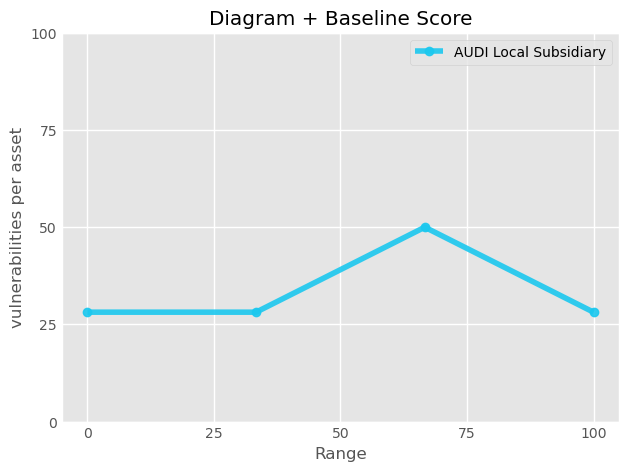

In [144]:
fig = plt.figure()
plt.plot( x , y, color='#1bc8ef',  alpha = 0.9, label = f'AUDI Local Subsidiary', marker='o', )
plt.xticks(np.linspace(0,100, num=5))
plt.yticks(np.linspace(0,100, num=5))
plt.xlabel('Range')
plt.legend()
plt.title('Diagram + Baseline Score')
plt.ylabel('vulnerabilities per asset')
plt.show()

In [38]:
y = np.array([28.14])

<AxesSubplot:>

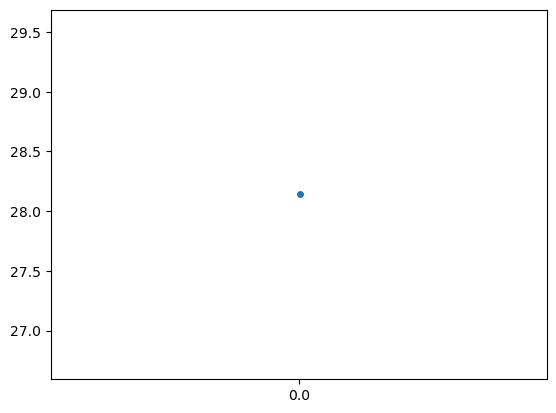

In [71]:
sns.stripplot(x=x, y=y)

In [131]:
x = np.linspace(0, 100, 4)
y = np.array([28.14])

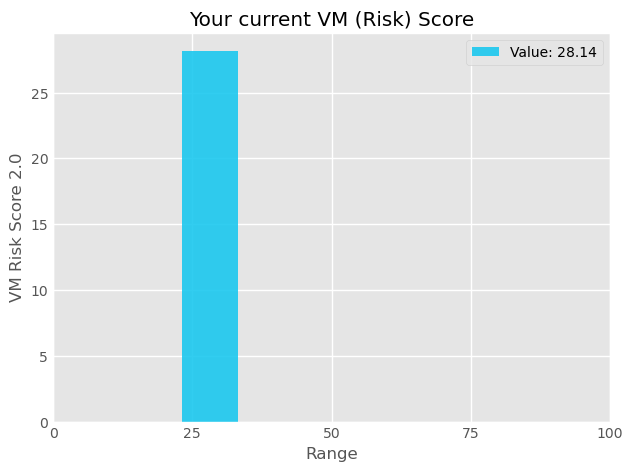

In [147]:
plt.bar( y[-1] , y[-1], color='#1bc8ef', width=10, alpha = 0.9, label = f'Value: {y[-1]}')
plt.xticks(np.linspace(0,100, num=5))
plt.xlabel('Range')
plt.legend()
plt.title('Your current VM (Risk) Score')
plt.ylabel('VM Risk Score 2.0')
plt.show()

([<matplotlib.axis.XTick at 0x7fa42c968d30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

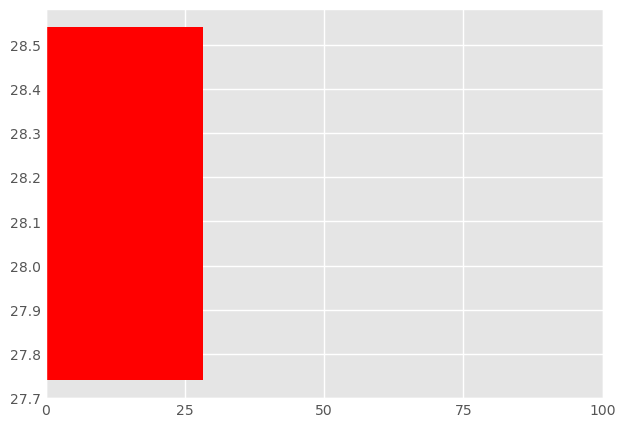

In [102]:
# plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
fig, ax = plt.subplots()
bars = ax.barh( y , y, color='red')
ax.bar_label(bars)
plt.xticks(np.linspace(0,100, num=5))
